# 서울시 공유자전거 '따릉이'의 수요 예측
**서울시 공유자전거 '따릉이'의 수와 날씨 사이의 연관성 분석**

## 1. 데이터 소개

- 데이터: `seoulbike_data.csv`

### 데이터의 변수 소개

- `date` : 날짜
- `hour` : 시간
- `PM10` : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- `PM2.5` : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- `ozone` : 오존 수치
- `temperature` : 온도
- `precipitation` : 강수 여부, 비가 오지 않았으면 0, 비가 오면 1
- `windspeed` : 풍속(평균)
- `humidity` : 습도
- `visibility` : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- `count` : 시간에 따른 따릉이 대여 수

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

import warnings
warnings.filterwarnings('ignore')

## 2. 가설 설정

- Target: 변수 `count`

- 가설
    - 귀무가설: **미세먼지/초미세먼지/오존/기온/강우 여부/풍속/습도/가시거리**와 따릉이 대여량은 관련이 없다.
    - 대립가설: **미세먼지/초미세먼지/오존/기온/강우 여부/풍속/습도/가시거리**와 따릉이 대여량은 관련이 있다.

In [2]:
df = pd.read_csv("./seoulbike_data.csv")
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


## 3. 단변량 분석
- 변수의 의미, 수치형 or 범주형, 결측치 존재 여부
- 기초통계량
- 변수 분포

In [13]:
# 범주형 변수에 대한 단변량 분석
def analyze_categorical_column(data, column_name, y_limit=None):
    print(f"'{column_name}'의 자료형: {data[column_name].dtypes}\n")
    print("-------------결측치 확인-------------")
    print(data[column_name].info(), "\n")
    print("-------------기초 통계량-------------")
    display(data[column_name].describe().to_frame().T)

    col1 = data[column_name].value_counts().sort_index().to_frame()
    col2 = (data[column_name].value_counts() / data.shape[0]).sort_index().to_frame()
    display(pd.concat([col1, col2], axis=1))

    sns.countplot(x=data[column_name])
    plt.title(f"Distribution of '{column_name}'")
    if y_limit:
        plt.ylim(y_limit)
    plt.grid()
    plt.show()

# 수치형 변수에 대한 단변량 분석
def analyze_numeric_column(data, column_name):
    print(f"'{column_name}'의 자료형: {data[column_name].dtypes}\n")
    print("-------------결측치 확인-------------")
    print(data[column_name].info(), "\n")
    print("-------------기초 통계량-------------")
    display(data[column_name].describe().to_frame().T)

    col1 = data[column_name].value_counts().sort_index().to_frame()
    col2 = (data[column_name].value_counts() / data.shape[0]).sort_index().to_frame()
    display(pd.concat([col1, col2], axis=1))

    plt.figure(figsize=(10, 6))
    plt.title(f"Histogram of '{column_name}'")

    plt.subplot(211)
    sns.histplot(x=data[column_name], bins=30, kde=True)

    plt.subplot(212)
    sns.boxplot(x=data[column_name])
    plt.grid()
    plt.show()

### 1) hour: 시간대

'hour'의 자료형: int64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
hour,5827.0,11.506607,6.921963,0.0,6.0,12.0,18.0,23.0


,hour,hour
0,243,0.041702
1,243,0.041702
2,242,0.041531
3,242,0.041531
4,241,0.041359
5,243,0.041702
6,242,0.041531
7,243,0.041702
8,243,0.041702
9,243,0.041702


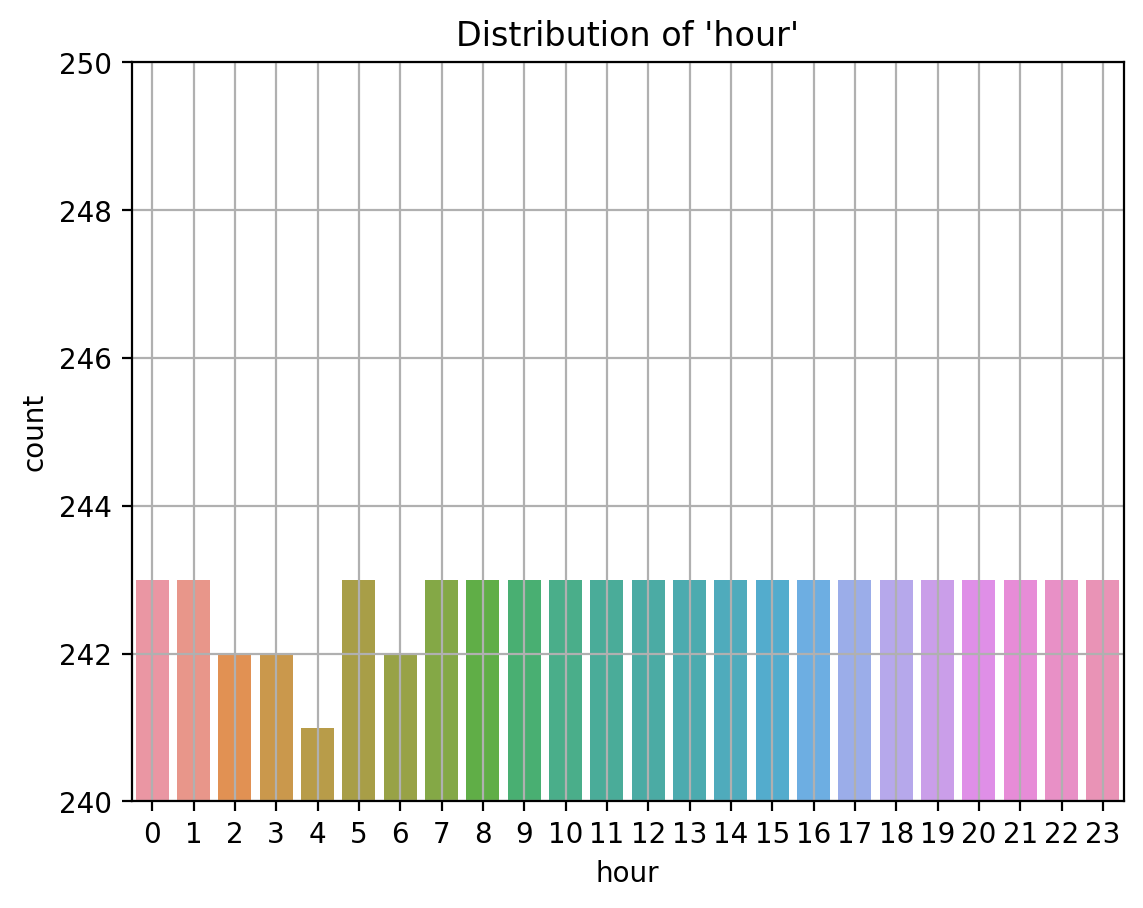

In [12]:
analyze_categorical_column(df, 'hour', y_limit=(240,250))

- `hour`는 범주형 데이터로, 결측치는 없다.
- 데이터는 고르게 분포되어 있다.

### 2) PM10: 미세먼지

'PM10'의 자료형: float64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5725 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
PM10,5725.0,31.970655,42.987292,3.0,16.0,25.0,37.0,827.0


,PM10,PM10
3.0,35,0.006007
4.0,30,0.005148
5.0,47,0.008066
6.0,65,0.011155
7.0,67,0.011498
...,...,...
706.0,1,0.000172
726.0,1,0.000172
799.0,1,0.000172
817.0,1,0.000172


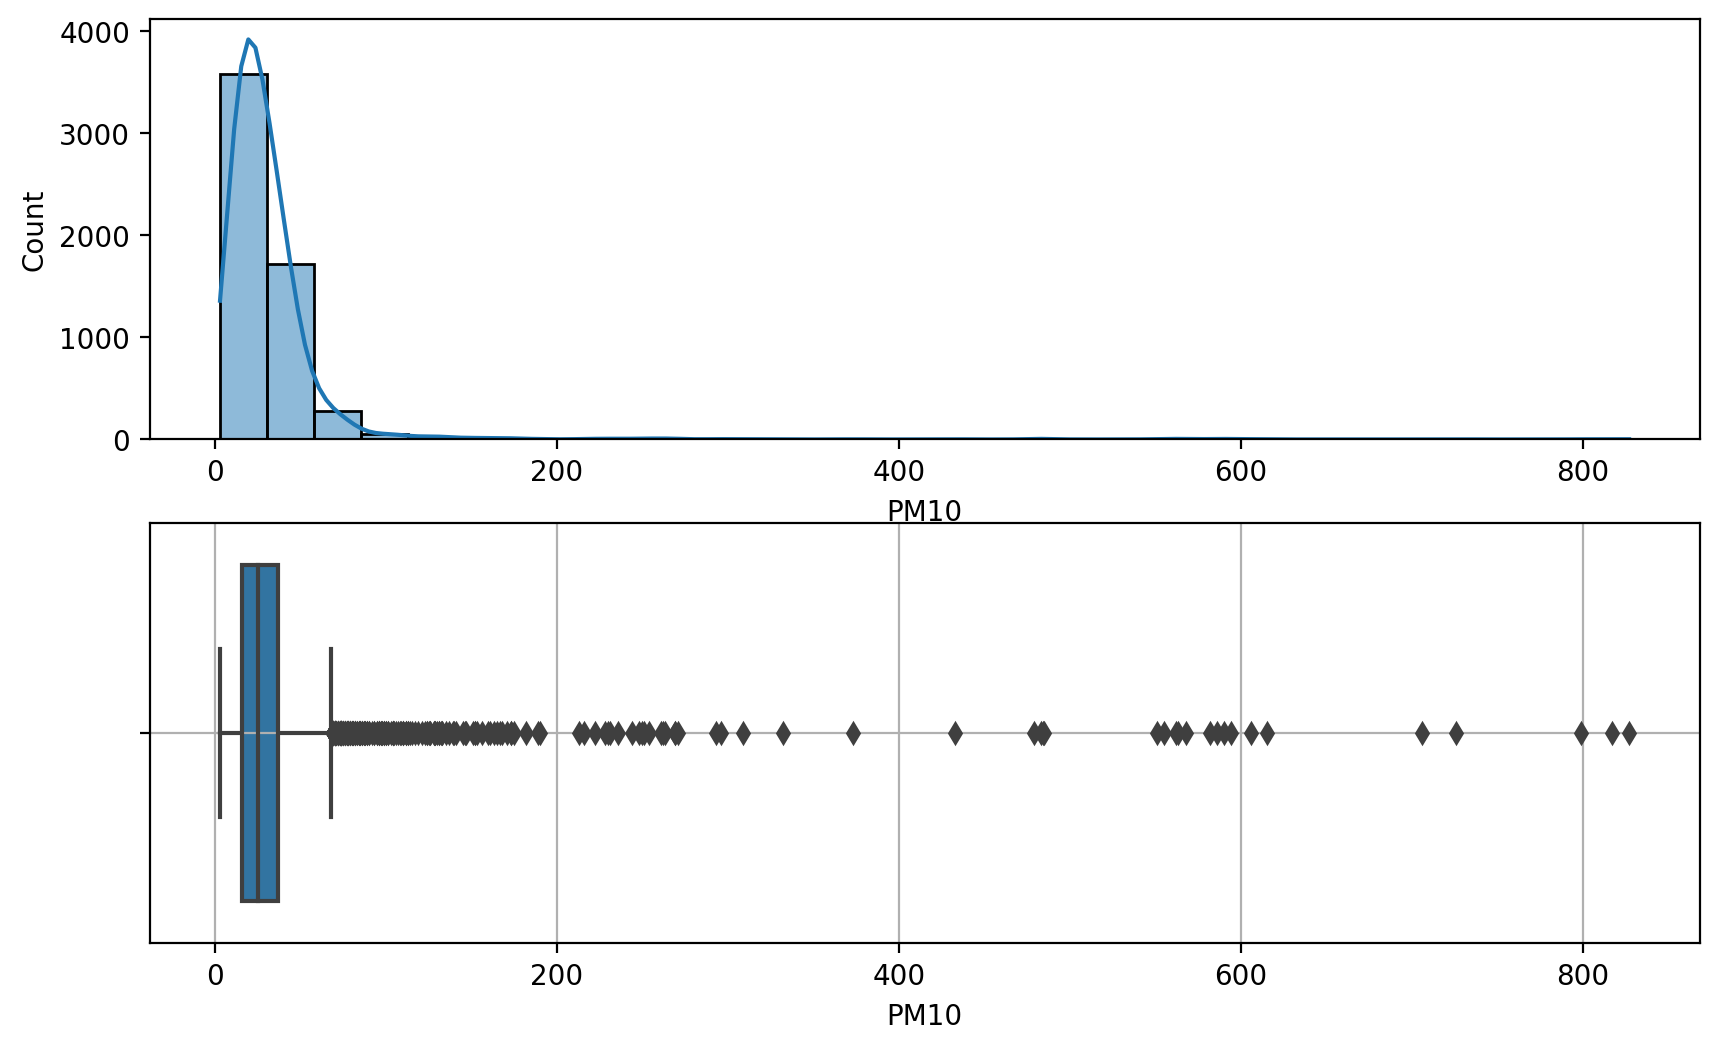

In [15]:
analyze_numeric_column(df, 'PM10')

- `PM10`은 수치형 데이터로, 결측치가 102개, 이상치 273개가 존재한다.
- 히스토그램과 KDE를 보면, 히스토그램이 right skewed된 분포를 보인다.  
    대부분의 `PM10` 레벨이 낮으나, 오른쪽으로 긴 꼬리에서 볼 수 있듯이 상당히 높은 값들도 존재한다.
- 박스플롯을 통해 `PM10` 수치가 높은 쪽에서 다수의 outlier를 찾을 수 있었다.

**<span style="color:red"> outlier만 뽑아서`count`와 이변량 분석을 해서 실제로 미세먼지가 심한 날에 따릉이의 사용이 줄어드는지 확인할 수 있을 것 같다.   </span>**

### 3) PM2.5: 초미세먼지 수치

'PM2.5'의 자료형: float64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5732 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
PM2.5,5732.0,15.666609,13.85099,1.0,7.0,13.0,20.0,125.0


,PM2.5,PM2.5
1.0,188,0.032264
2.0,160,0.027458
3.0,211,0.036211
4.0,244,0.041874
5.0,265,0.045478
...,...,...
120.0,2,0.000343
121.0,1,0.000172
122.0,1,0.000172
123.0,1,0.000172


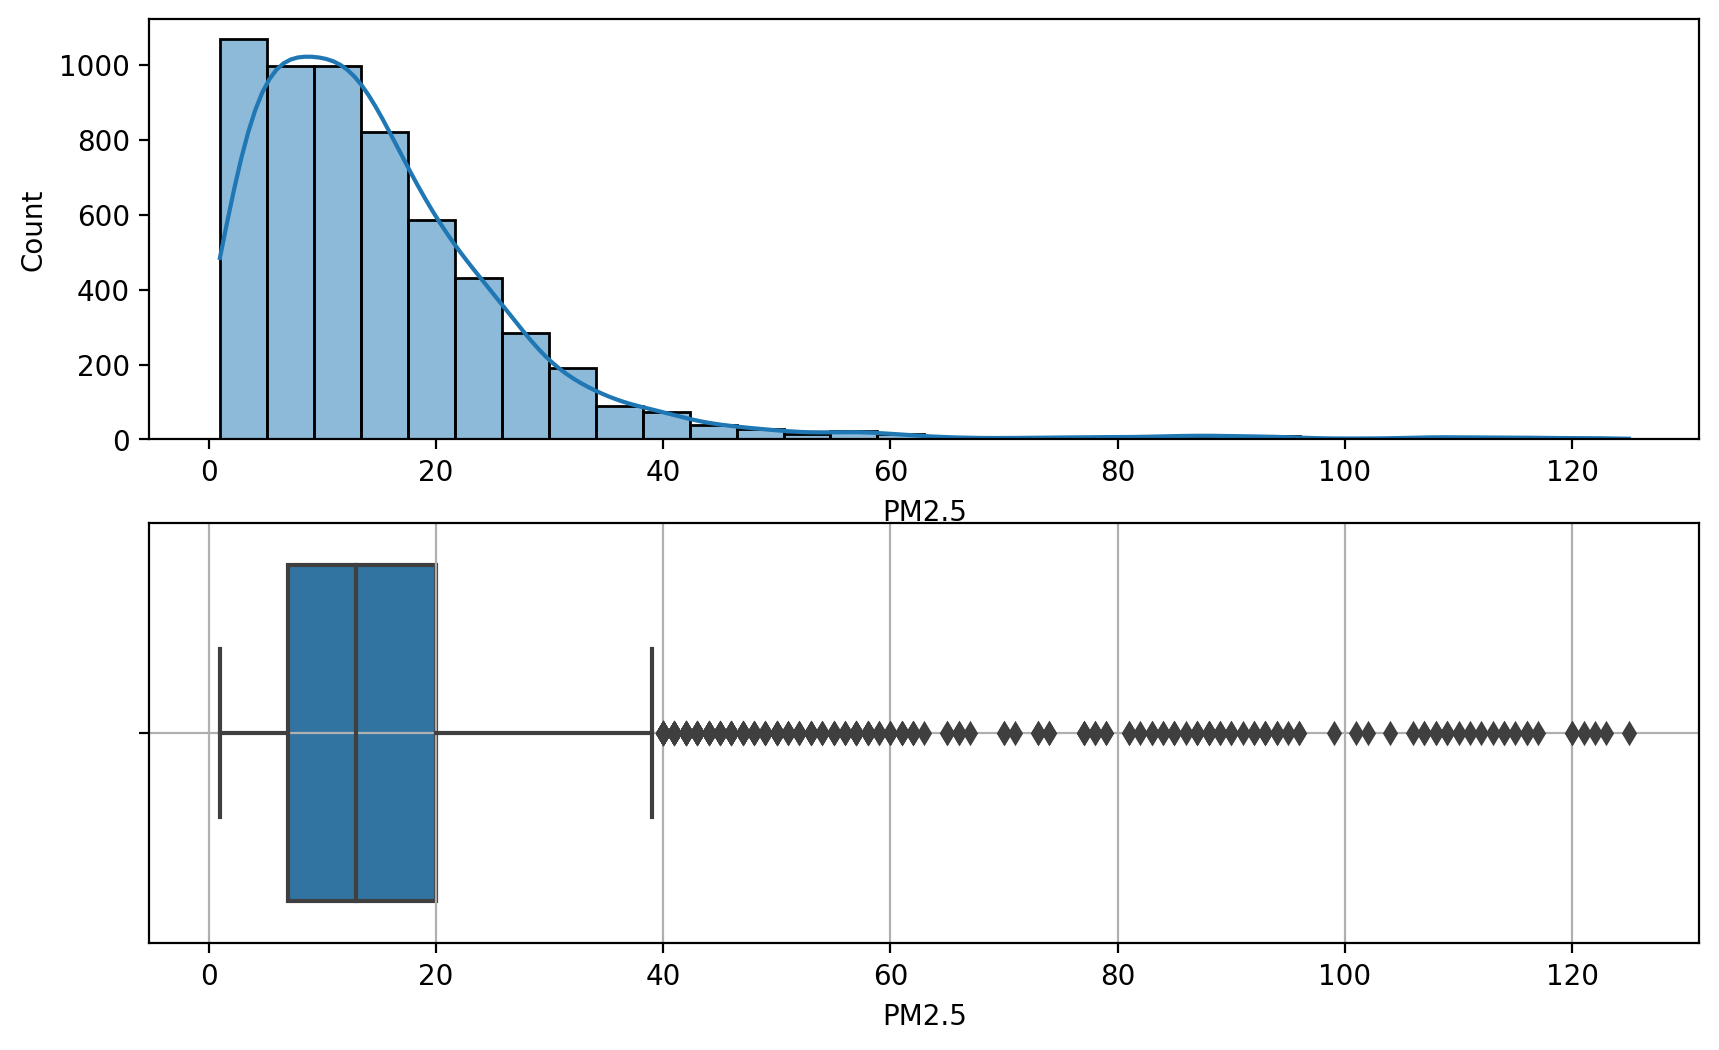

In [16]:
analyze_numeric_column(df, 'PM2.5')

- 수치형 데이터로, 결측치가 95개, 이상치 243개가 있다.
- 히스토그램과 KDE를 보면, 히스토그램이 오른쪽으로 치우친 분포를 보인다.  
대부분의 `PM2.5` 레벨이 낮으나, 오른쪽으로 긴 꼬리에서 볼 수 있듯이 상당히 높은 값들도 존재한다.
- 박스플롯을 통해 `PM2.5` 수치가 높은 쪽에서 다수의 outlier를 찾을 수 있었다.

**<span style="color:red"> outlier만 뽑아서`count`와 이변량 분석을 해서 실제로 초미세먼지가 심한 날에 따릉이의 사용이 줄어드는지 확인할 수 있을 것 같다.   </span>**

### 4) ozone: 오존 지수

'ozone'의 자료형: float64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
ozone,5699.0,0.031811,0.018277,0.001,0.019,0.031,0.041,0.137


,ozone,ozone
0.001,4,0.000686
0.002,177,0.030376
0.003,104,0.017848
0.004,57,0.009782
0.005,47,0.008066
...,...,...
0.111,1,0.000172
0.115,1,0.000172
0.116,1,0.000172
0.118,1,0.000172


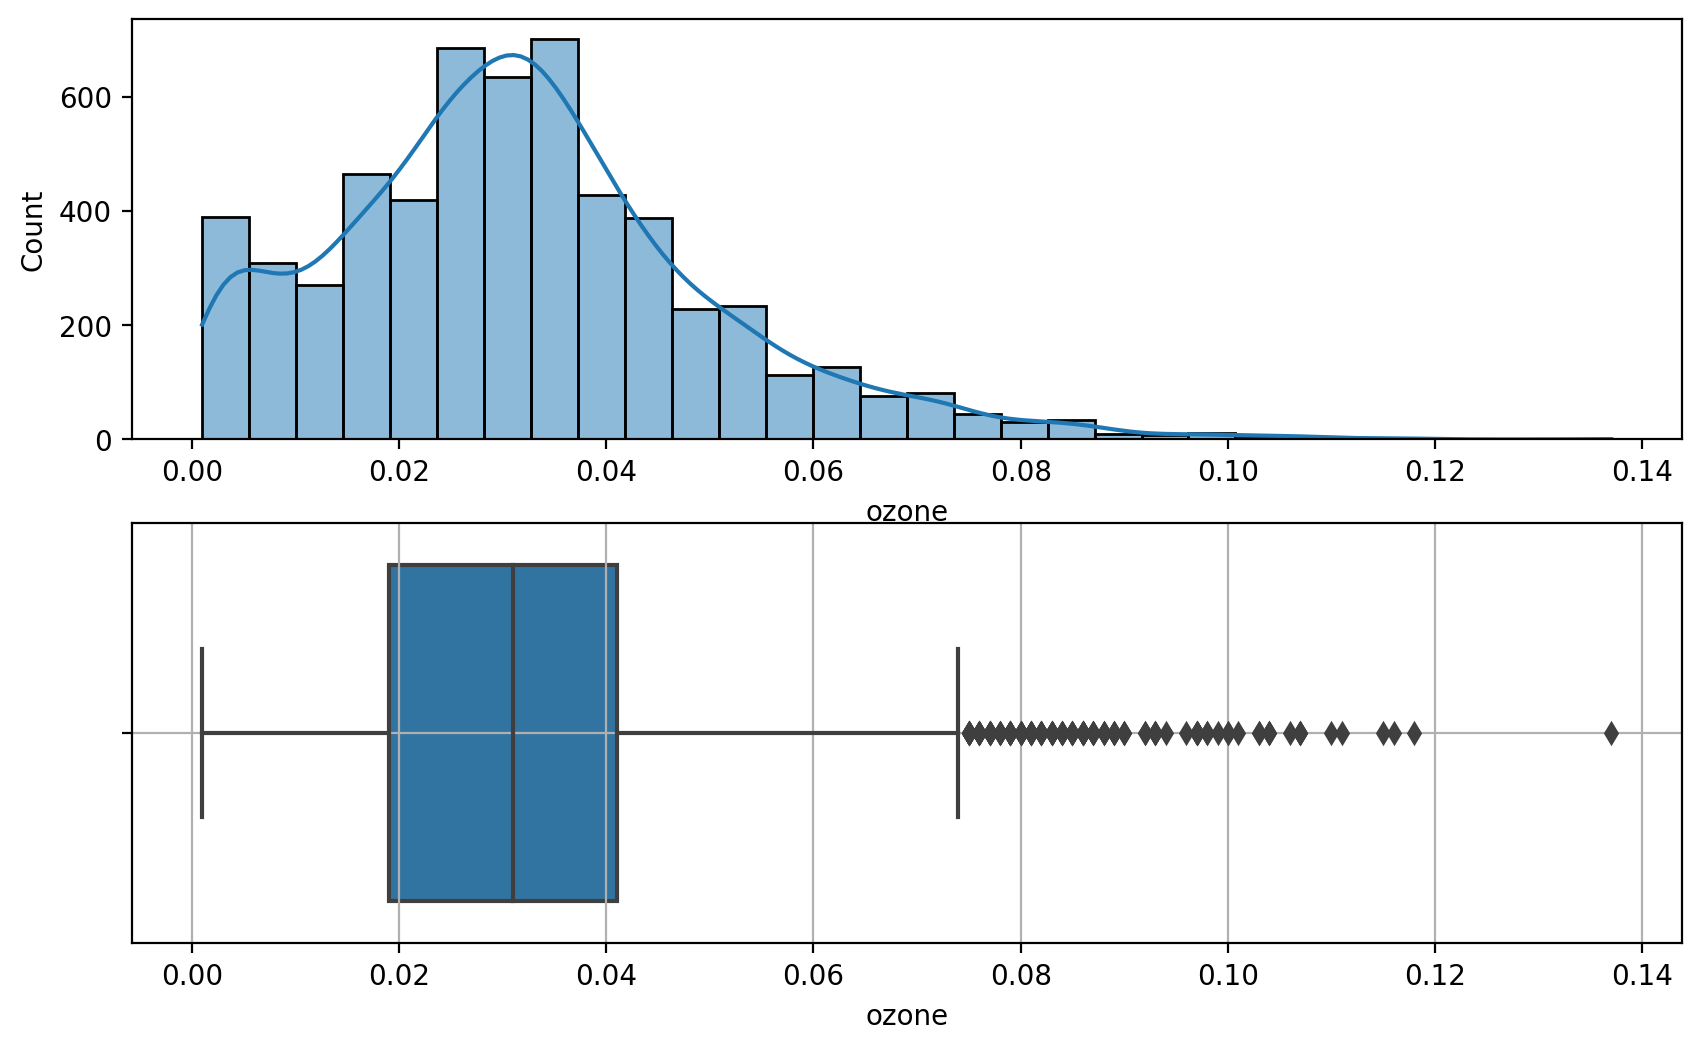

In [17]:
analyze_numeric_column(df, 'ozone')

- 수치형 데이터로, 결측치가 128개, 이상치 140개 있다.
- 히스토그램과 KDE를 보면, 히스토그램이 대체적으로 정규분포의 모습을 보이고 있다.  
대부분의 `PM2.5` 레벨이 낮으나, 오른쪽으로 긴 꼬리에서 볼 수 있듯이 상당히 높은 값들도 존재한다.
- 박스플롯을 통해 `PM2.5` 수치가 높은 쪽에서 다수의 outlier를 찾을 수 있었다.

**<span style="color:red"> outlier만 뽑아서`count`와 이변량 분석을 해서 실제로 초미세먼지가 심한 날에 따릉이의 사용이 줄어드는지 확인할 수 있을 것 같다.   </span>**

### 5) temperature: 기온

'temperature'의 자료형: float64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
temperature,5827.0,19.376798,7.501572,-3.5,14.1,20.4,24.9,36.3


,temperature,temperature
-3.5,2,0.000343
-3.2,1,0.000172
-2.7,1,0.000172
-2.5,1,0.000172
-2.4,1,0.000172
...,...,...
35.6,1,0.000172
35.7,4,0.000686
36.0,1,0.000172
36.1,1,0.000172


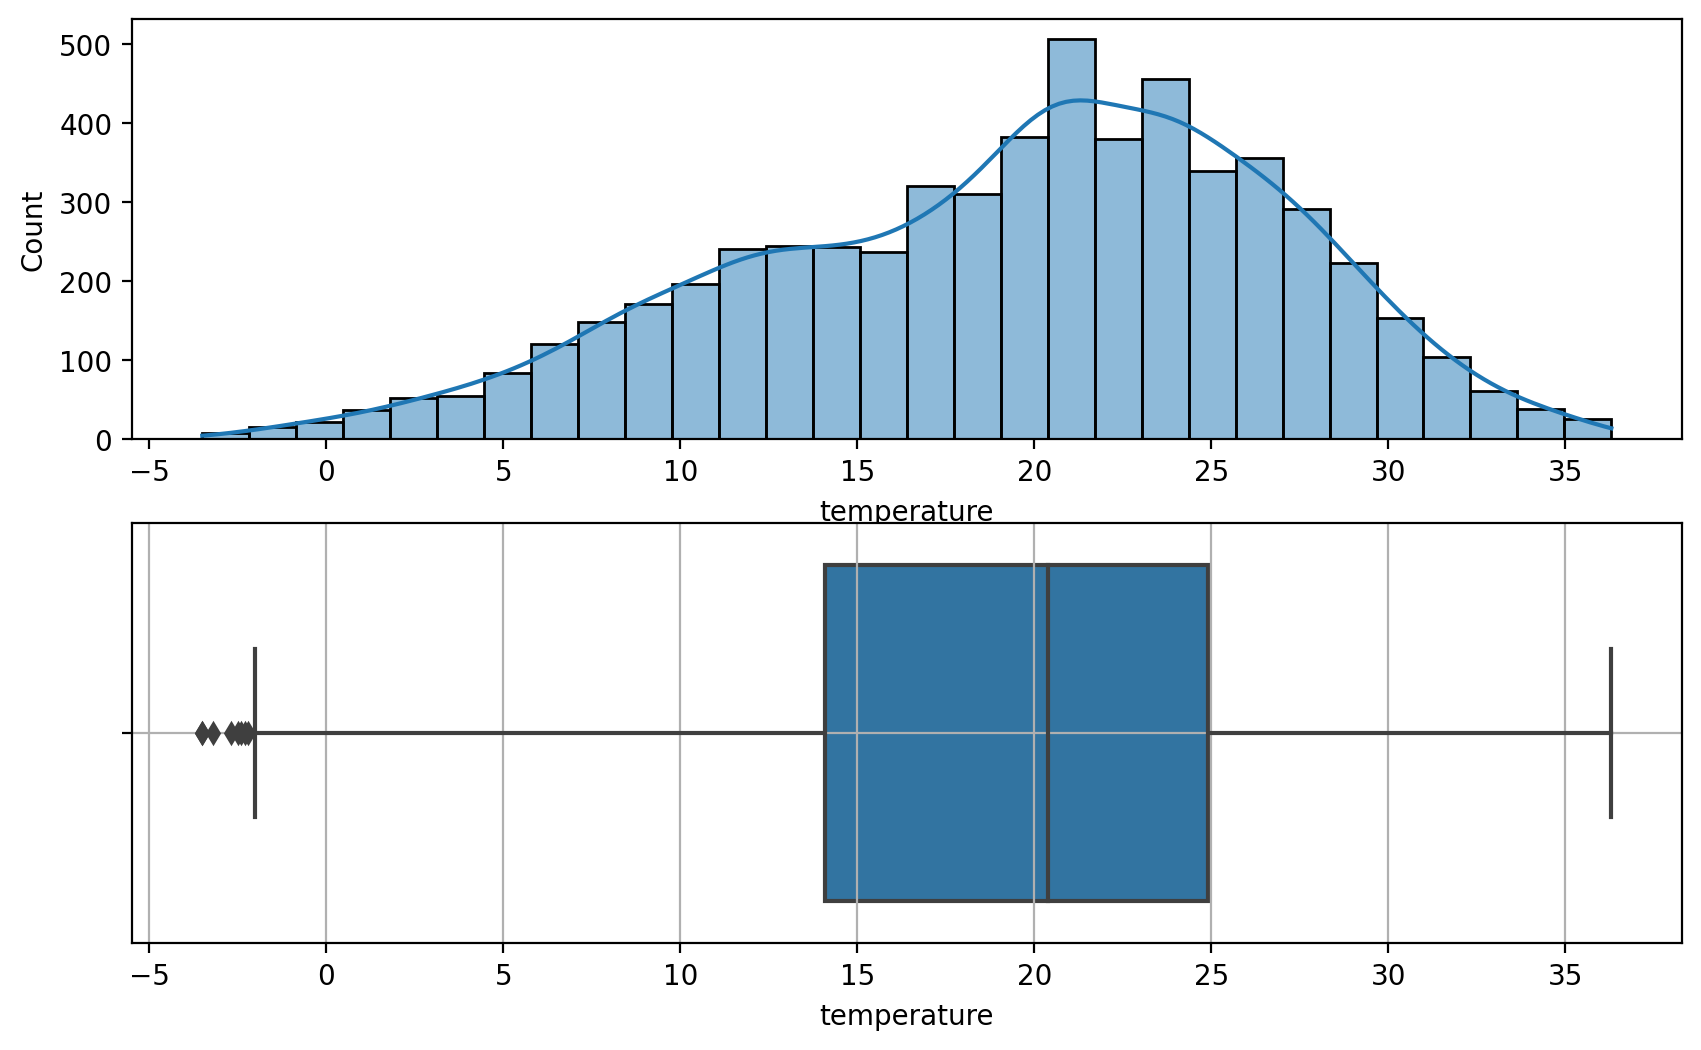

In [18]:
analyze_numeric_column(df, 'temperature')

- 수치형 데이터로, 결측치 없고, 이상치 8개 있다.
- 대체로 정규분포에 가까운 히스토그램과 KDE를 갖는다.
- 이상치 또한 영하에서 약 8개를 갖는데, 그 갯수가 비율적 측면에서 매우 작기 때문에 무의미하다고 생각했다.

### 6) precipitation: 강수 여부 (비오면 1, 비 안오면 0)

'precipitation'의 자료형: int64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
precipitation,5827.0,0.075511,0.264236,0.0,0.0,0.0,0.0,1.0


,precipitation,precipitation
0,5387,0.924489
1,440,0.075511


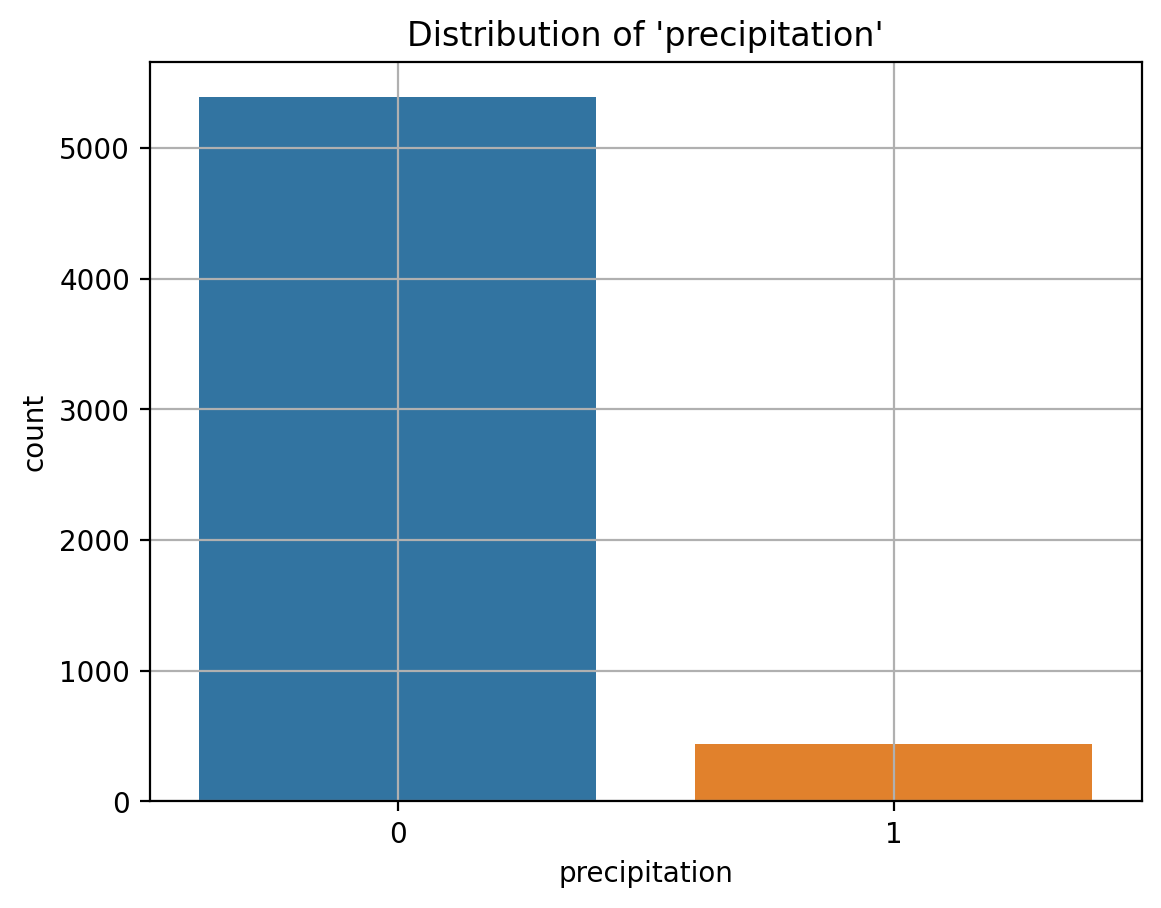

In [21]:
analyze_categorical_column(df, 'precipitation')

- 범주형 데이터로, 결측치는 없다.
- 전체 데이터 중에서 비가 오지 않은 비율이 92.4%로 한쪽으로 매우 치우친 모습을 보인다.

### 7) windspeed: 평균 풍속

'windspeed'의 자료형: float64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
windspeed,5827.0,2.237601,1.054516,0.0,1.5,2.2,2.8,8.3


,windspeed,windspeed
0.0,8,0.001373
0.1,13,0.002231
0.2,24,0.004119
0.3,39,0.006693
0.4,48,0.008238
...,...,...
6.7,3,0.000515
6.8,1,0.000172
6.9,1,0.000172
8.1,1,0.000172


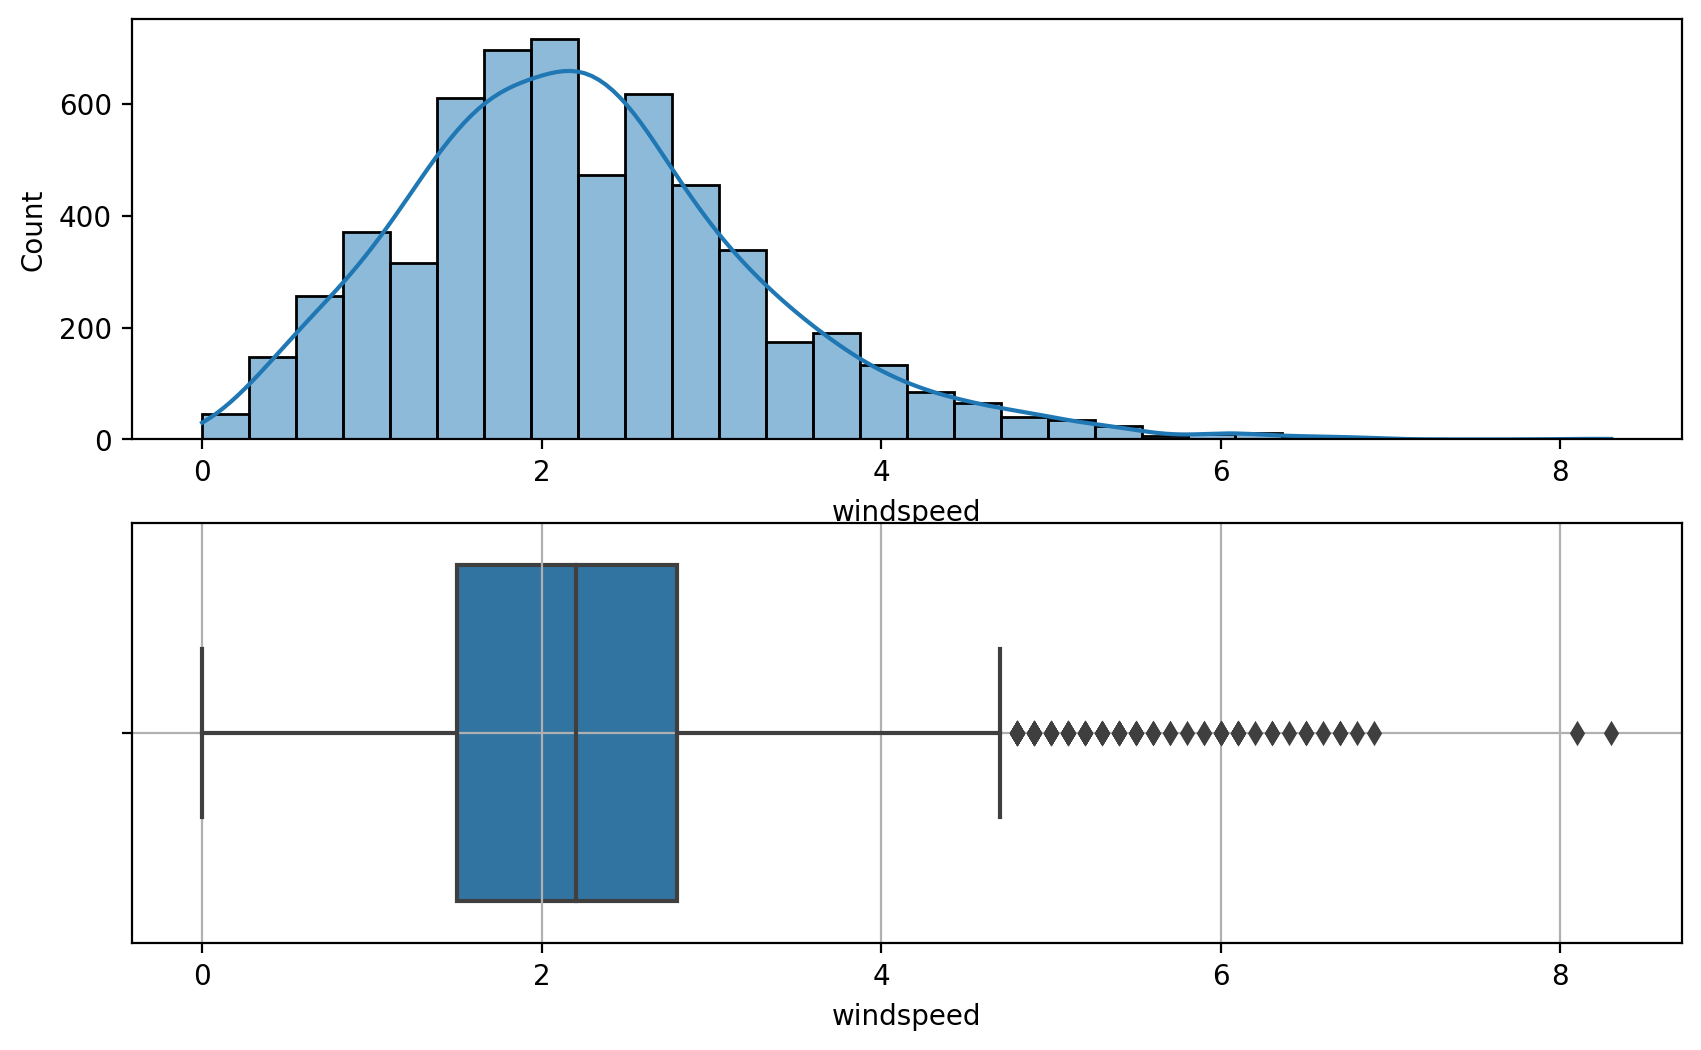

In [23]:
analyze_numeric_column(df, 'windspeed')

- 수치형 데이터로, 결측치는 없고, 이상치 138개가 있다.
- 히스토그램과 KDE를 보면, 대체적으로 정규분포의 모습을 보이나, 오른쪽으로 긴 꼬리를 갖는다.
- 박스플롯에서도 이상치가 탐지된다.

### 8) humidity: 습도

'humidity'의 자료형: int64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
humidity,5827.0,68.608718,17.277266,19.0,56.0,70.0,82.0,100.0


,humidity,humidity
19,1,0.000172
20,3,0.000515
21,2,0.000343
22,2,0.000343
23,5,0.000858
...,...,...
96,56,0.009610
97,50,0.008581
98,50,0.008581
99,30,0.005148


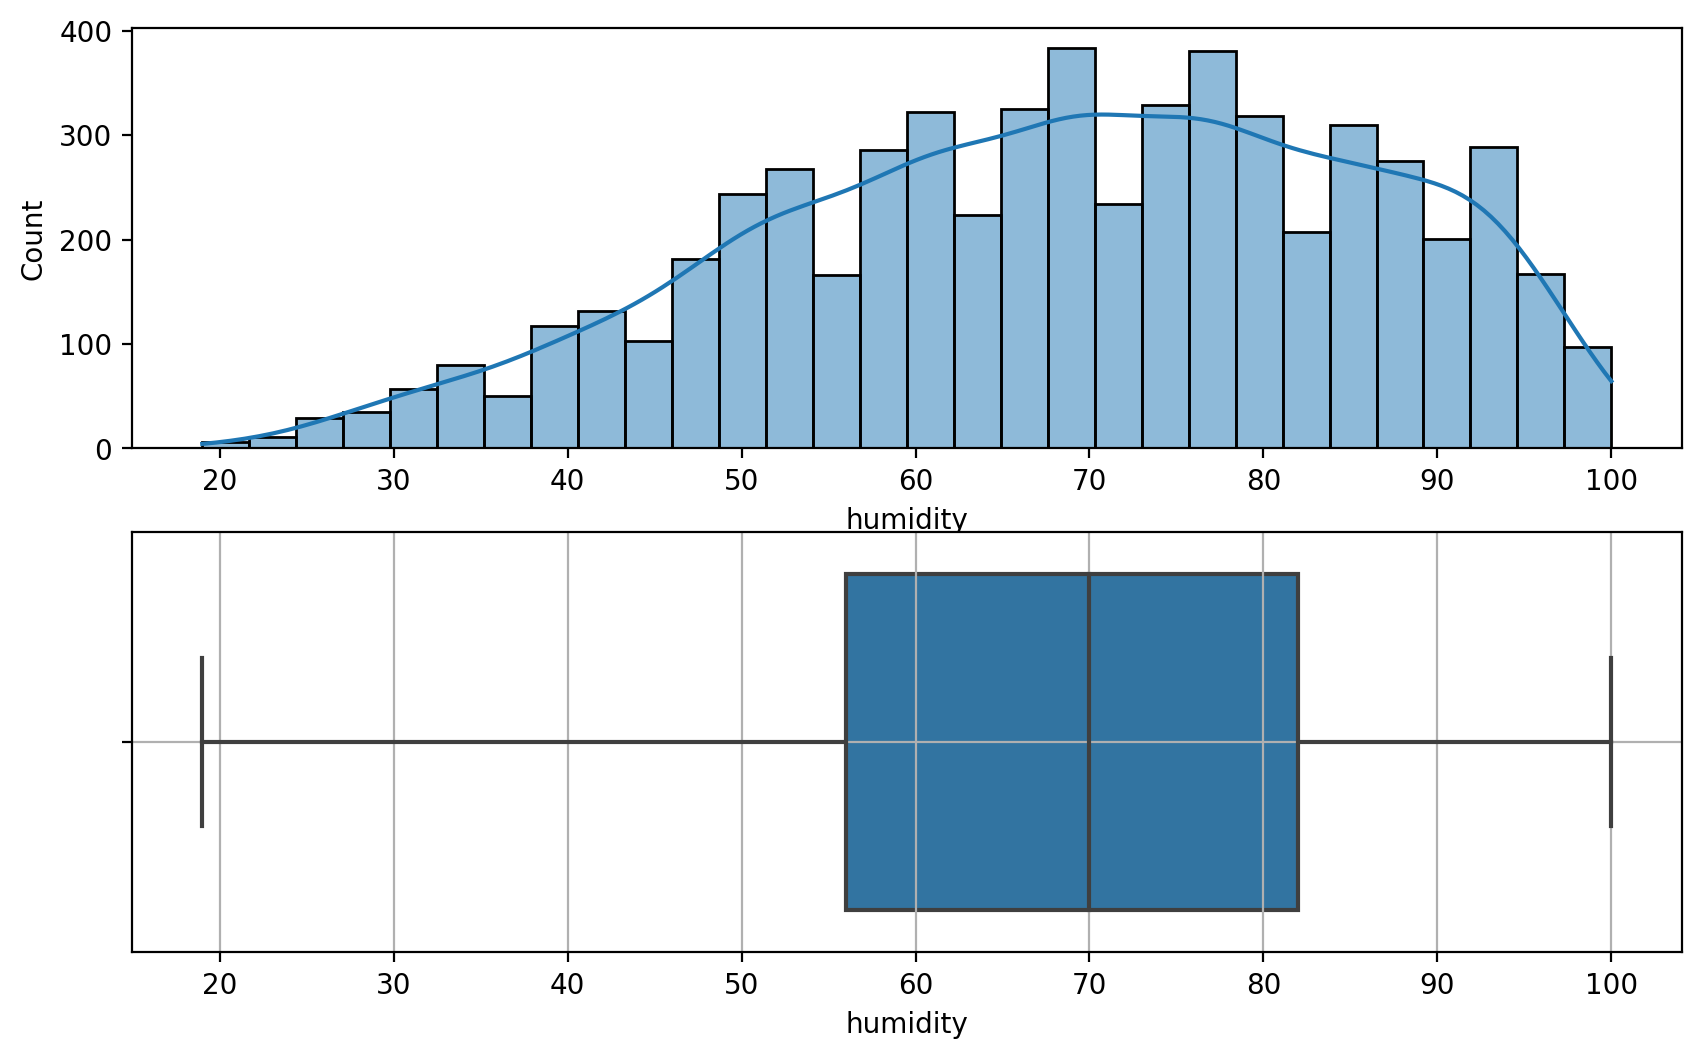

In [24]:
analyze_numeric_column(df, 'humidity')

### 9) visibility: 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)

'visibility'의 자료형: int64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
visibility,5827.0,1758.438648,490.969394,60.0,1935.5,2000.0,2000.0,2000.0


,visibility,visibility
60,1,0.000172
61,1,0.000172
68,1,0.000172
73,1,0.000172
77,1,0.000172
...,...,...
1996,8,0.001373
1997,6,0.001030
1998,2,0.000343
1999,5,0.000858


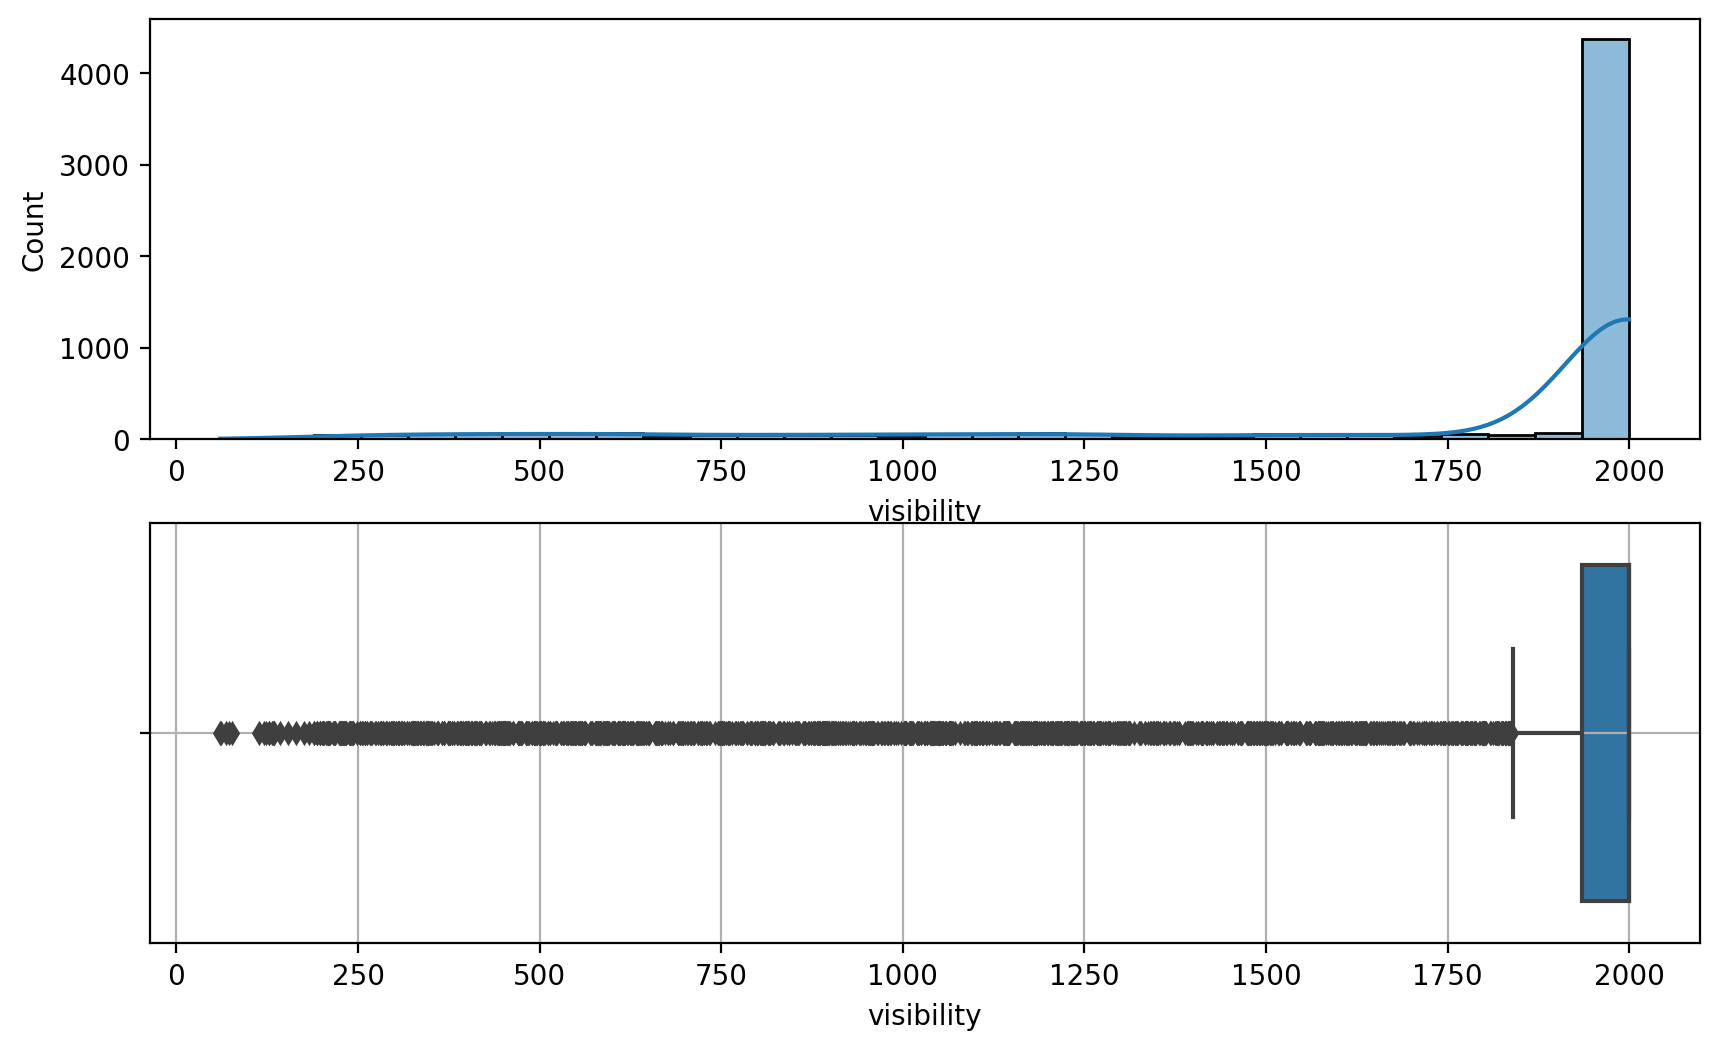

In [25]:
analyze_numeric_column(df, 'visibility')

- 수치형 데이터로, 결측치는 없지만 이상치가 1370개로 상당히 많음을 알 수 있다.
- `PM10` 또는 `PM2.5`가 높은 날, `precipitation=1`인 경우 가시거리가 좋지 않은 것을 생각했다.  
따라서 `visibility`가 낮은 날은 이상치가 너무 많기도 하고 범위의 가장 높은 부분에 절대 다수가 몰려 있기 때문에 중요성이 떨어지는 변수라고 생각했다.

### 10) count: 시간에 따른 따릉이 대여 수

'count'의 자료형: int64

-------------결측치 확인-------------
<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB
None 

-------------기초 통계량-------------


,count,mean,std,min,25%,50%,75%,max
count,5827.0,215.117899,185.9729,1.0,53.0,186.0,315.0,1746.0


,count,count
1,19,0.003261
2,26,0.004462
3,20,0.003432
4,20,0.003432
5,22,0.003776
...,...,...
1086,1,0.000172
1090,1,0.000172
1126,1,0.000172
1600,1,0.000172


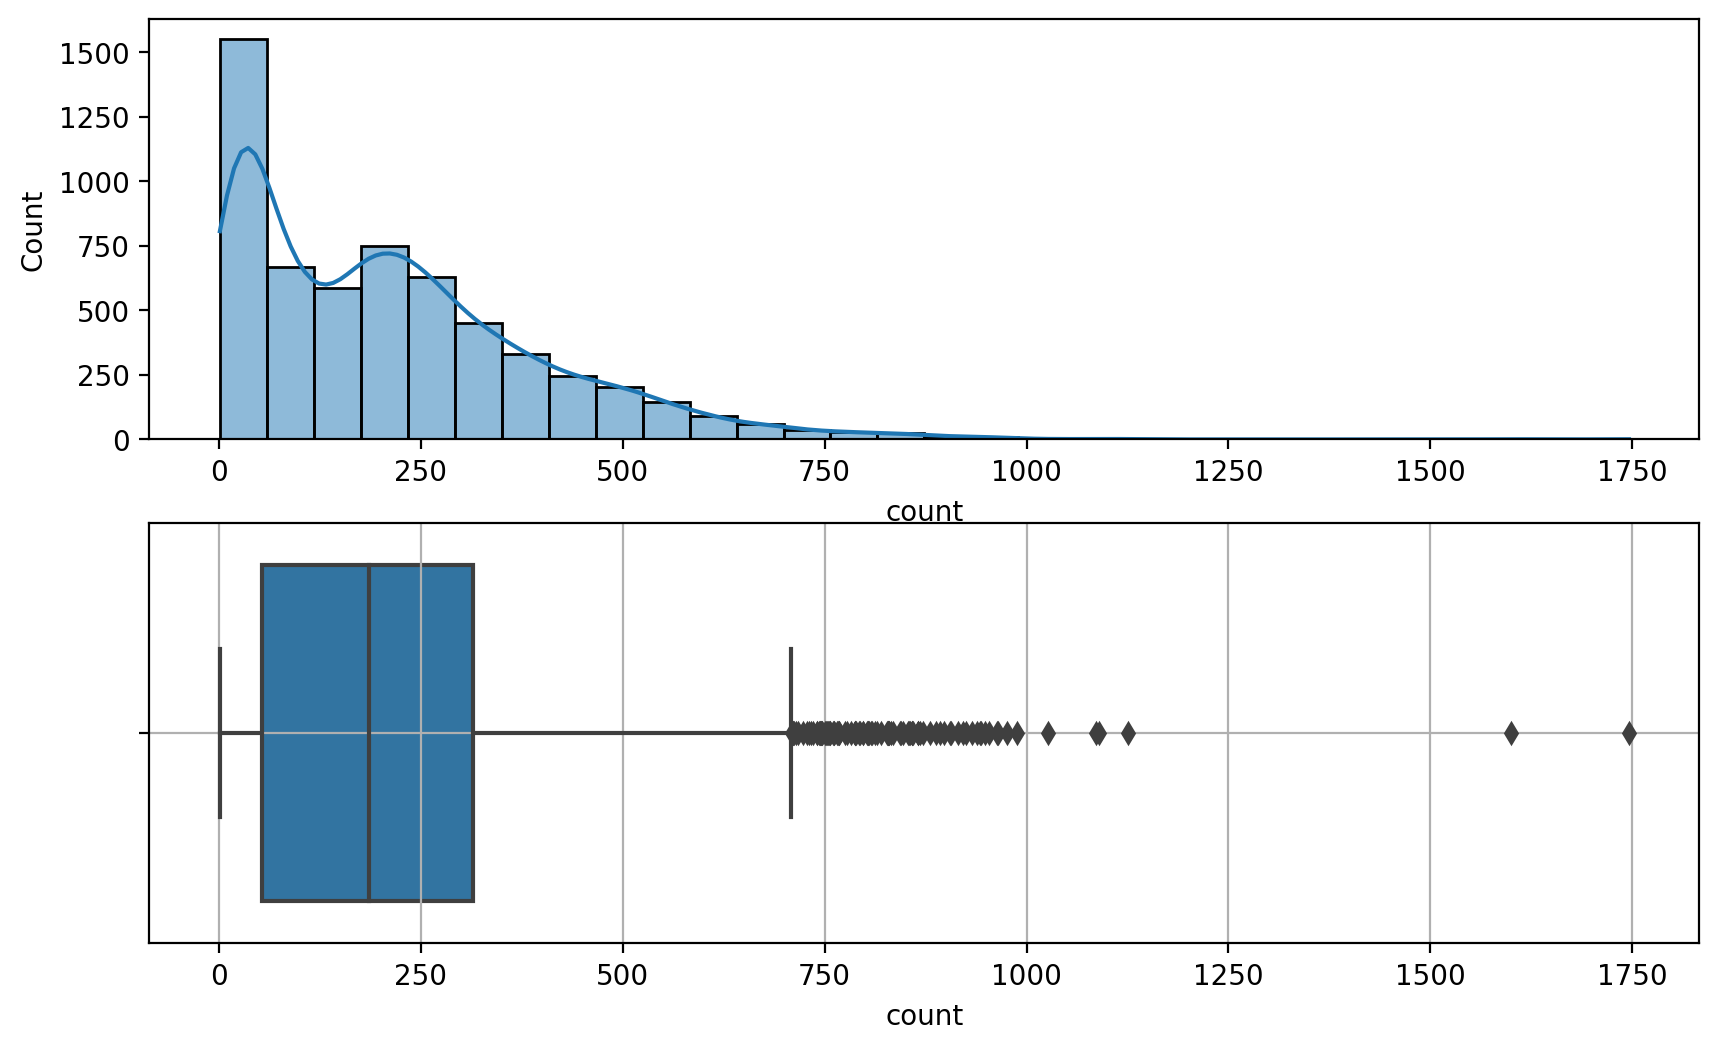

In [26]:
analyze_numeric_column(df, 'count')

- 수치형 데이터로, 결측치는 없고 이상치 103개 있다.
- 히스토그램과 KDE가 왼쪽으로 치우친 것에서 대체적으로 시간당 대여량은 0~750임을 알 수 있었다.

## 4. 단변량 분석 보충

In [149]:
def find_notoutliers_iqr(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_series[(data_series > lower_bound) | (data_series < upper_bound)]
    return outliers

### 1) PM10과 PM2.5

In [55]:
from sklearn.impute import KNNImputer

In [150]:
df_1 = find_notoutliers_iqr(df['PM10']).to_frame()     # 'PM10'의 이상치만 추출한 DataFrame
df_2 = find_notoutliers_iqr(df['PM2.5']).to_frame()    # 'PM2.5'의 이상치만 추출한 DataFrame
df_dust = pd.concat([df_1, df_2], axis=1)

df_count = df.loc[df_dust.index, 'count'].to_frame()  # 'count' 컬럼만 있는 DataFrame
df_dust = pd.concat([df_dust, df_count], axis=1)
df_dust

,PM10,PM2.5,count
0,42.0,21.0,46
1,41.0,21.0,40
2,30.0,13.0,31
3,27.0,12.0,12
4,29.0,14.0,30
...,...,...,...
4443,NaN,21.0,167
4444,NaN,23.0,244
4445,NaN,22.0,296
4446,NaN,24.0,365


In [151]:
imputer = KNNImputer(n_neighbors=2)
df_dust = imputer.fit_transform(df_dust)
df_dust = pd.DataFrame(df_dust, columns = ['PM10', 'PM2.5', 'count'])
df_dust

,PM10,PM2.5,count
0,42.0,21.0,46.0
1,41.0,21.0,40.0
2,30.0,13.0,31.0
3,27.0,12.0,12.0
4,29.0,14.0,30.0
...,...,...,...
5735,38.0,21.0,167.0
5736,41.5,23.0,244.0
5737,33.0,22.0,296.0
5738,48.0,24.0,365.0


#### KNNImputer를 쓴 이유
- "`PM10`과 `PM2.5`는 상관관계는 0.75로 매우 높게 나타난다"는 분석 결과를 기반으로 두 변수가 비슷한 양상을 보일 것이라고 생각했다.  
  [출처: [미세먼지의 원인, 빅데이터로 찾는다](https://dataonair.or.kr/db-tech-reference/d-story/data-story/?mod=document&uid=62852)]
- 이후 이변량 분석을 진행하며 이상치를 포함한 경우와 이상치를 제거한 경우의 `PM10`과 `PM2.5`의 `count`와의 상관관계를 분석할 계획이다.

## 5. 이변량 분석
- 시각화(그래프)와 수치화(가설검정) 수행 및 결과 평가
- 참고사항
    - 적절한 유의수준
    - 수치 → 수치: 상관분석
    - 범주 → 범주: 카이제곱검정
    - 범주 → 수치: t검정, 분산분석
    - 수치 → 범주: 로지스틱 회귀모형을 통해 회귀계수의 p-value로 검정 수행

### 1) 범주형 feature → Target(`count`: 수치형)
- 시각화: 그래프 활용한 분석
- 수치화: t-test, anova

#### (1) `hour`-`count`

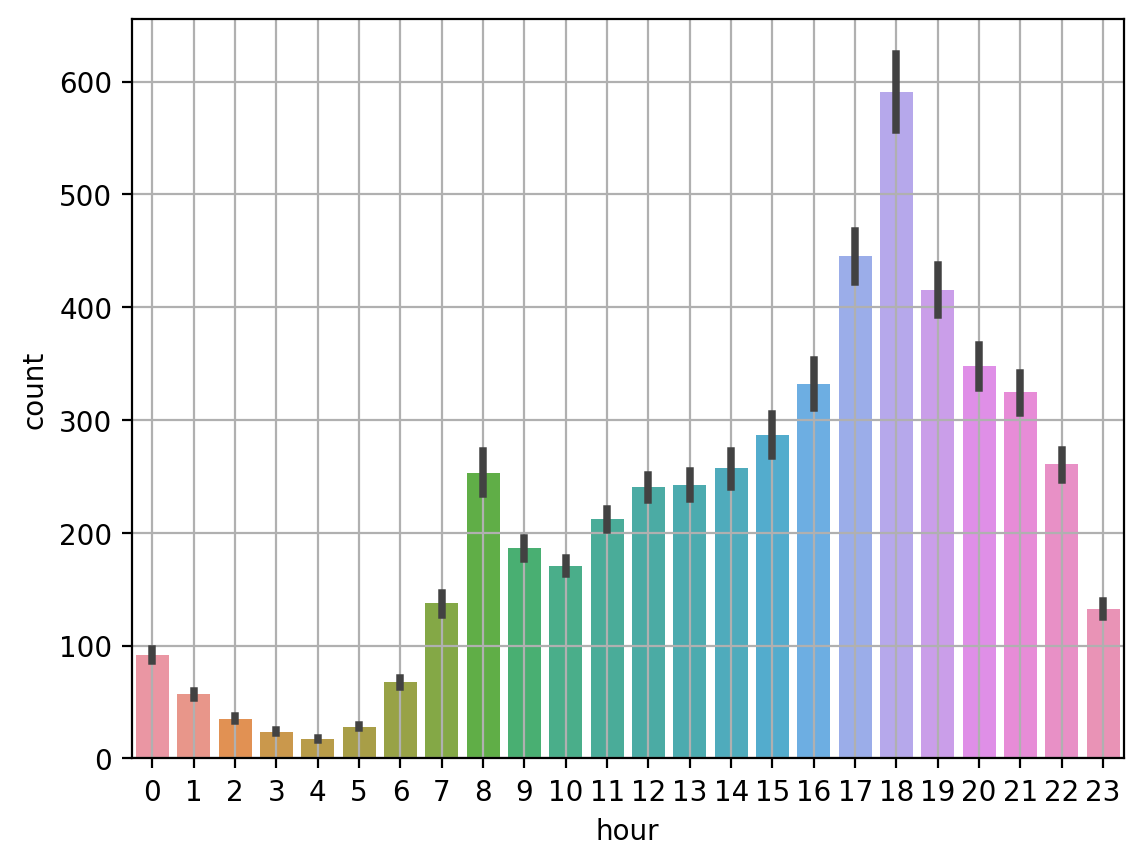

f-statistic: 401.69288
p-value: 0.0


In [131]:
# 시각화
sns.barplot(x='hour', y='count', data=df)
plt.grid()
plt.show()

# 수치화: ANOVA 테스트
count_by_hour = [df.loc[df['hour'] == hour, 'count'] for hour in range(24)]
f_stat, p_value = spst.f_oneway(*count_by_hour)

print(f"f-statistic: {f_stat:.5f}")
print(f"p-value: {p_value}")

- 분석 결과를 통해, `hour`와 `count`가 통계적으로 유의미하게 다르다고 볼 수 있다.
- f-statistic와 p-value를 통해, 시간대와 따릉이 대여량 간에는 **강한 상관관계**가 있음을 알 수 있다.

#### (2) `precipitation`-`count`

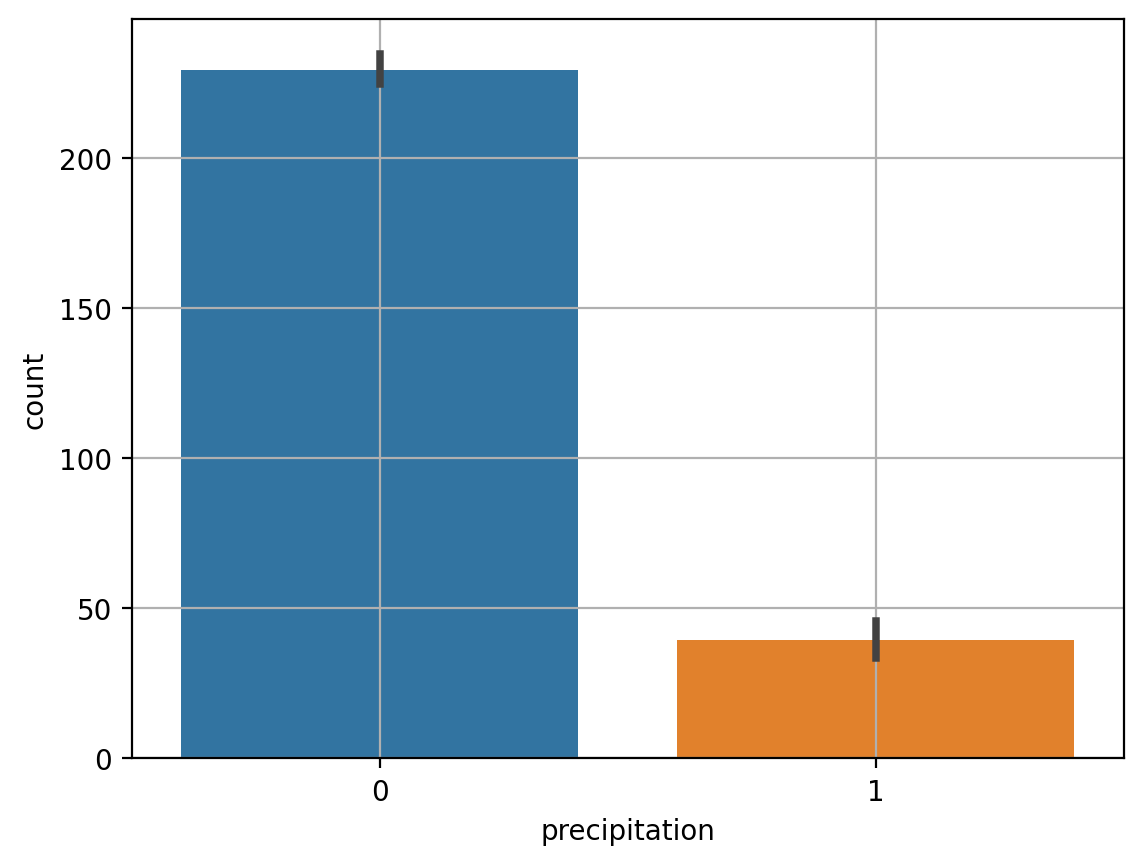

t-statistic: 21.38961
p-value: 8.86239184041254e-98


In [28]:
# 시각화
sns.barplot(x='precipitation', y='count', data=df)
plt.grid()
plt.show()

# 수치화
rain_x = df.loc[df['precipitation'] == 0, 'count']
rain_o = df.loc[df['precipitation'] == 1, 'count']
t_stat, p_value = spst.ttest_ind(rain_x, rain_o)

print(f"t-statistic: {t_stat:.5f}")
print(f"p-value: {p_value}")

- 분석 결과를 통해, `precipitation`과 `count`가 통계적으로 유의미하게 다르다고 볼 수 있다.
- t-statistic와 p-value를 통해, 강우 여부와 따릉이 대여량 간에는 **강한 상관관계**가 있음을 알 수 있다.

### 2) 숫자형 feature → Target(`count`: 수치형)
- 시각화: 그래프 활용한 분석
- 수치화: 상관분석

In [138]:
# 결측치 모두 제거
df_notnull = df.dropna(axis=0)

#### (1) `PM10`-`count`

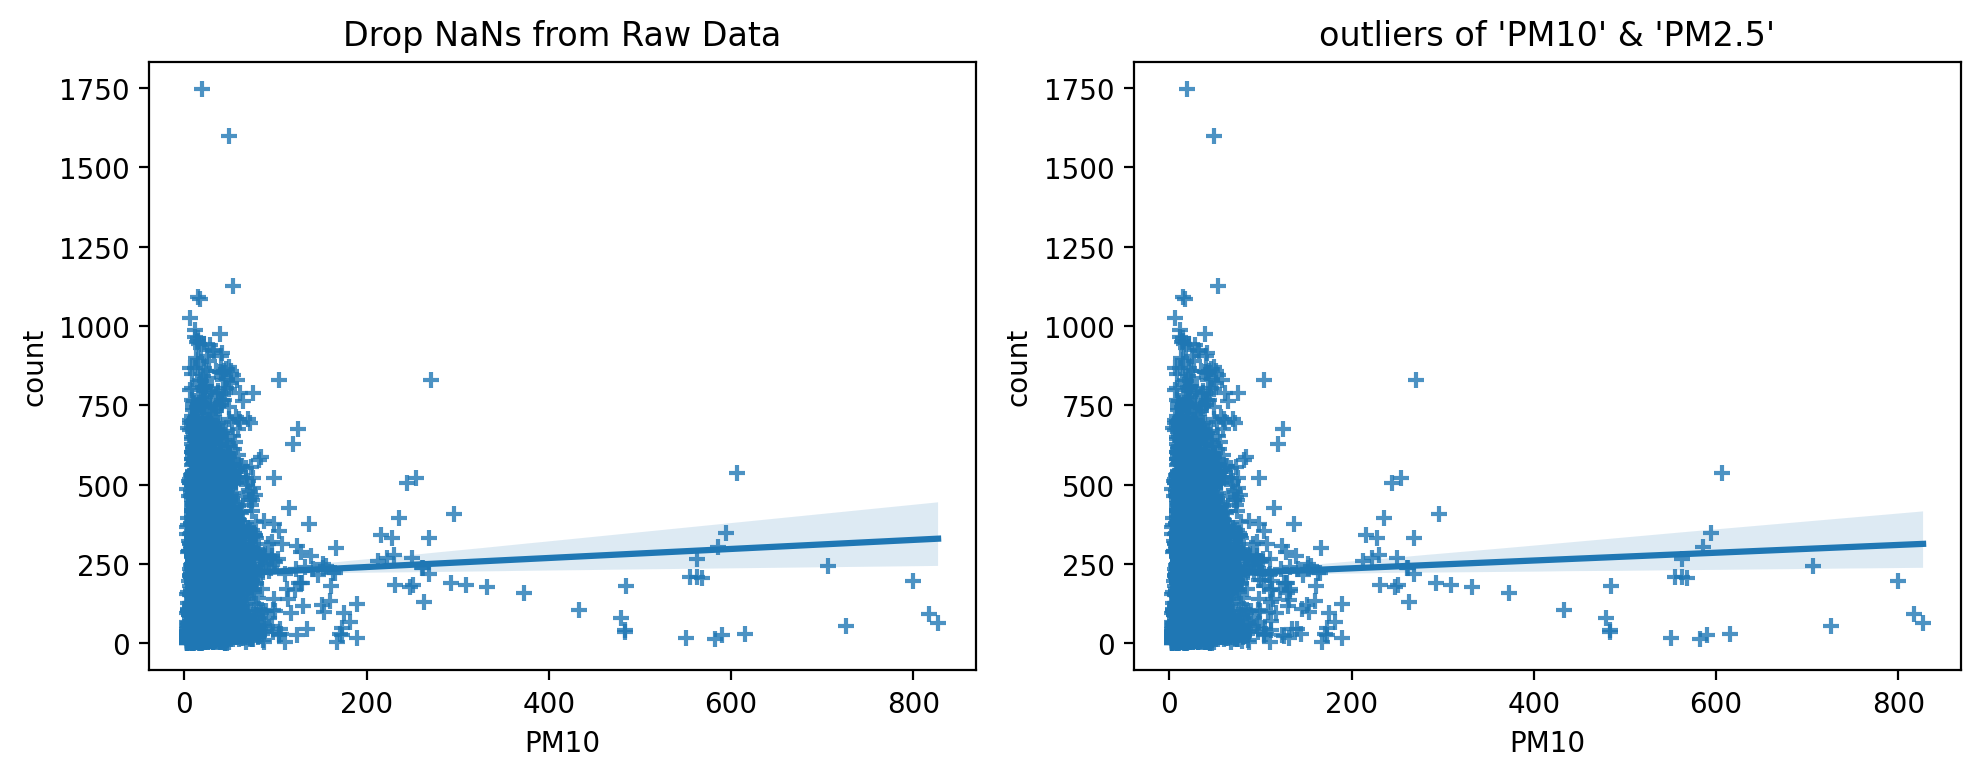

결측치 제거한 데이터
statistics: 0.03263, p-value: 0.014011785053987305
이상치 제거한 데이터
statistics: 0.02826, p-value: 0.03224528770386908


In [157]:
## 시각화
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Drop NaNs from Raw Data")
sns.regplot(x='PM10', y='count', marker='+', data=df_notnull)

plt.subplot(122)
plt.title("outliers of 'PM10' & 'PM2.5'")
sns.regplot(x='PM10', y='count', marker='+', data=df_dust)
plt.tight_layout()
plt.show()

# 수치화
print("결측치 제거한 데이터")
stat, p_value = spst.pearsonr(df_notnull['PM10'], df_notnull['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

print("이상치 제거한 데이터")
stat, p_value = spst.pearsonr(df_dust['PM10'], df_dust['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

- `PM10`과 `count` 사이의 상관계수는 약 0.0326으로, 아주 약한 양의 상관관계를 갖는다.  
    p-value가 0.05 미만이므로 이 결과는 통계적으로 유의미하다고 볼 수 있다.  
- `PM10`과 `count` 사이의 상관계수는 약 0.0322으로, 아주 약한 양의 상관관계를 갖는다.  
    p-value가 0.05 미만이므로 통계적으로 유의미하다고 볼 수 있다.

**하지만 상관계수 자체가 매우 낮기 때문에 두 변수 사이에 선형 관계가 있다고 보기는 어렵다.**

#### (2) `PM2.5`-`count`

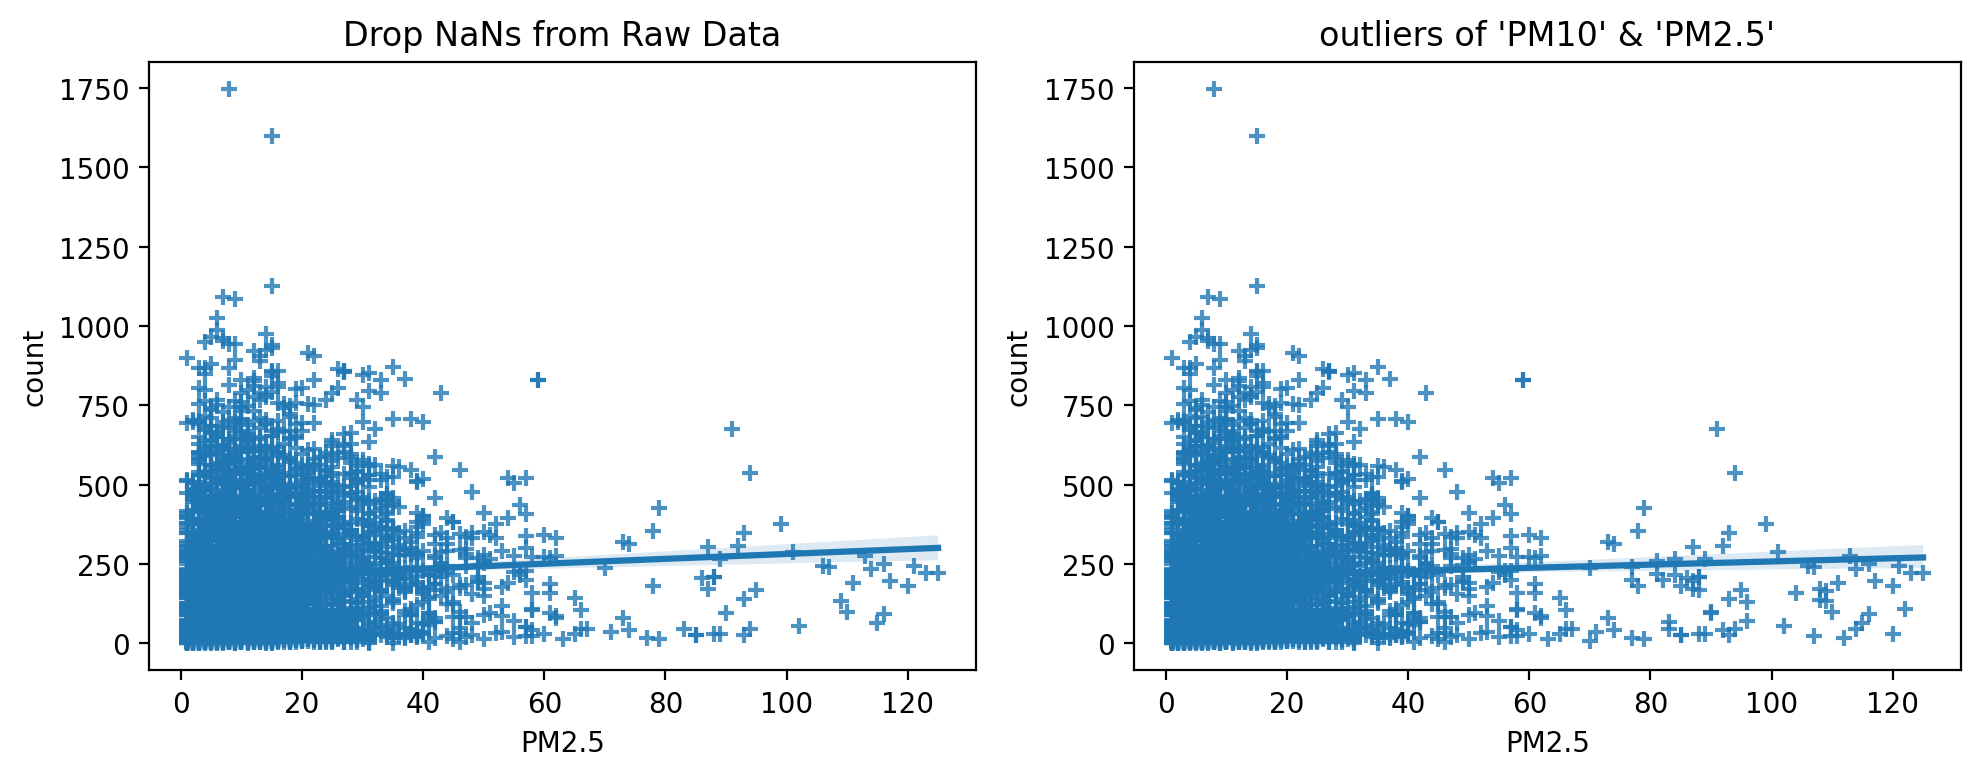

결측치 제거한 데이터
statistics: 0.05292, p-value: 6.690256718091076e-05
이상치 제거한 데이터
statistics: 0.03717, p-value: 0.004854024069183587


In [156]:
## 시각화
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Drop NaNs from Raw Data")
sns.regplot(x='PM2.5', y='count', marker='+', data=df_notnull)

plt.subplot(122)
plt.title("outliers of 'PM10' & 'PM2.5'")
sns.regplot(x='PM2.5', y='count', marker='+', data=df_dust)
plt.tight_layout()
plt.show()

# 수치화
print("결측치 제거한 데이터")
stat, p_value = spst.pearsonr(df_notnull['PM2.5'], df_notnull['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

print("이상치 제거한 데이터")
stat, p_value = spst.pearsonr(df_dust['PM2.5'], df_dust['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

- `PM2.5`와 `count` 사이의 상관계수는 약 0.05292로, 아주 약한 양의 상관관계를 갖는다.  
    p-value가 0이므로 이 결과는 통계적으로 유의미하다고 볼 수 있다. 
- `PM2.5`와 `count` 사이의 상관계수는 약 0.03717로, 아주 약한 양의 상관관계를 갖는다.  
    p-value가 0.005로 이 결과는 통계적으로 유의미하다고 볼 수 있다.

**하지만 상관계수 자체가 매우 낮기 때문에 두 변수 사이에 선형 관계가 있다고 보기는 어렵다.**

#### (3) `ozone`-`count`

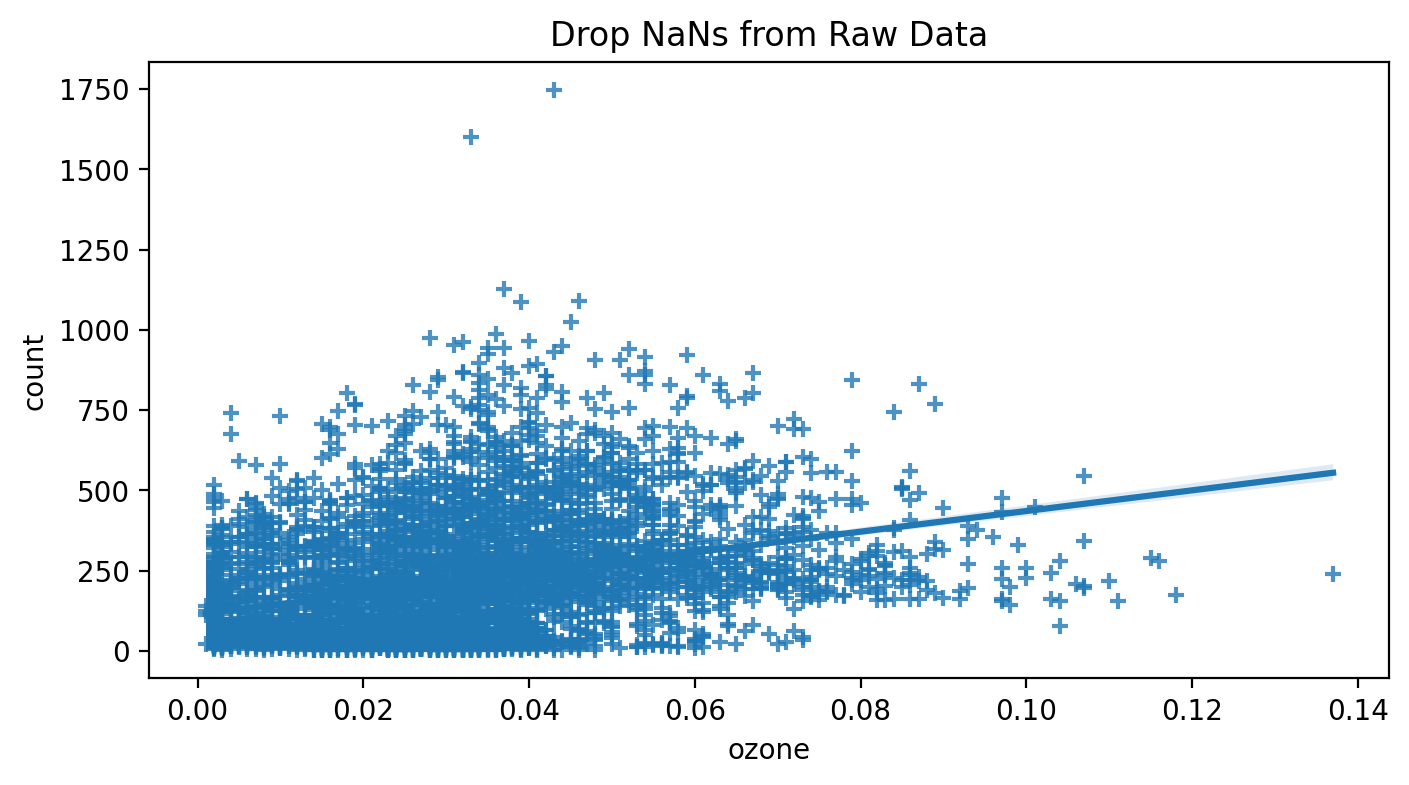

statistics: 0.31434, p-value: 3.0255231892712766e-130


In [164]:
## 시각화
plt.figure(figsize=(8,4))
plt.title("Drop NaNs from Raw Data")
sns.regplot(x='ozone', y='count', marker='+', data=df_notnull)
plt.show()

# 수치화
stat, p_value = spst.pearsonr(df_notnull['ozone'], df_notnull['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

`ozone`과 `count` 사이의 상관계수는 약 0.31434로, 중간정도의 양의 상관관계를 갖는다.  
p-value가 0이므로 이 결과는 통계적으로 유의미하다고 볼 수 있다. 

#### (4) `temperature`-`count`

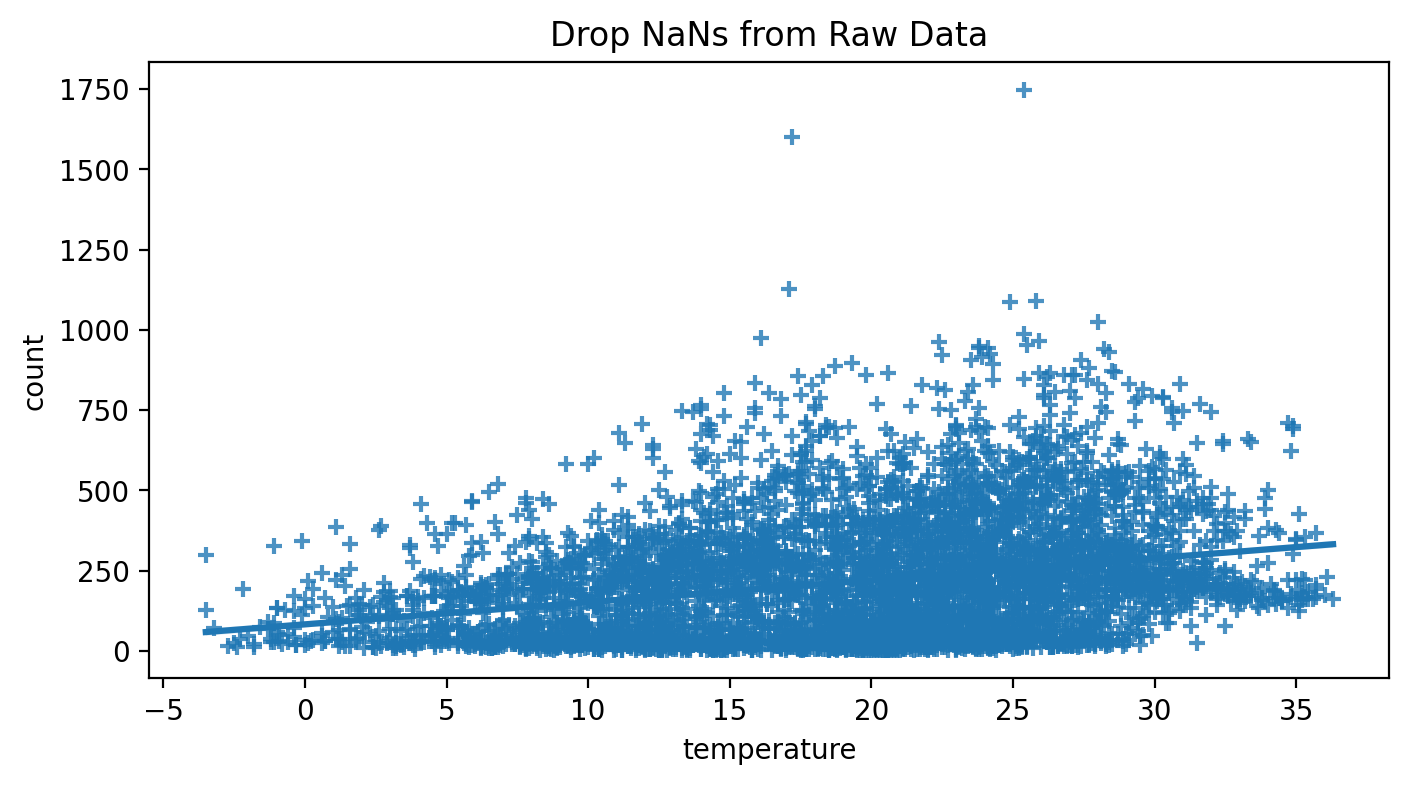

statistics: 0.27416, p-value: 2.5850113135440728e-98


In [165]:
## 시각화
plt.figure(figsize=(8,4))
plt.title("Drop NaNs from Raw Data")
sns.regplot(x='temperature', y='count', marker='+', data=df_notnull)
plt.show()

# 수치화
stat, p_value = spst.pearsonr(df_notnull['temperature'], df_notnull['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

`temperature`와 `count` 사이의 상관계수는 약 0.27416로, 약한 양의 상관관계를 갖는다.  
p-value가 0이므로 이 결과는 통계적으로 유의미하다고 볼 수 있다. 

#### (5) `windspeed`-`count`

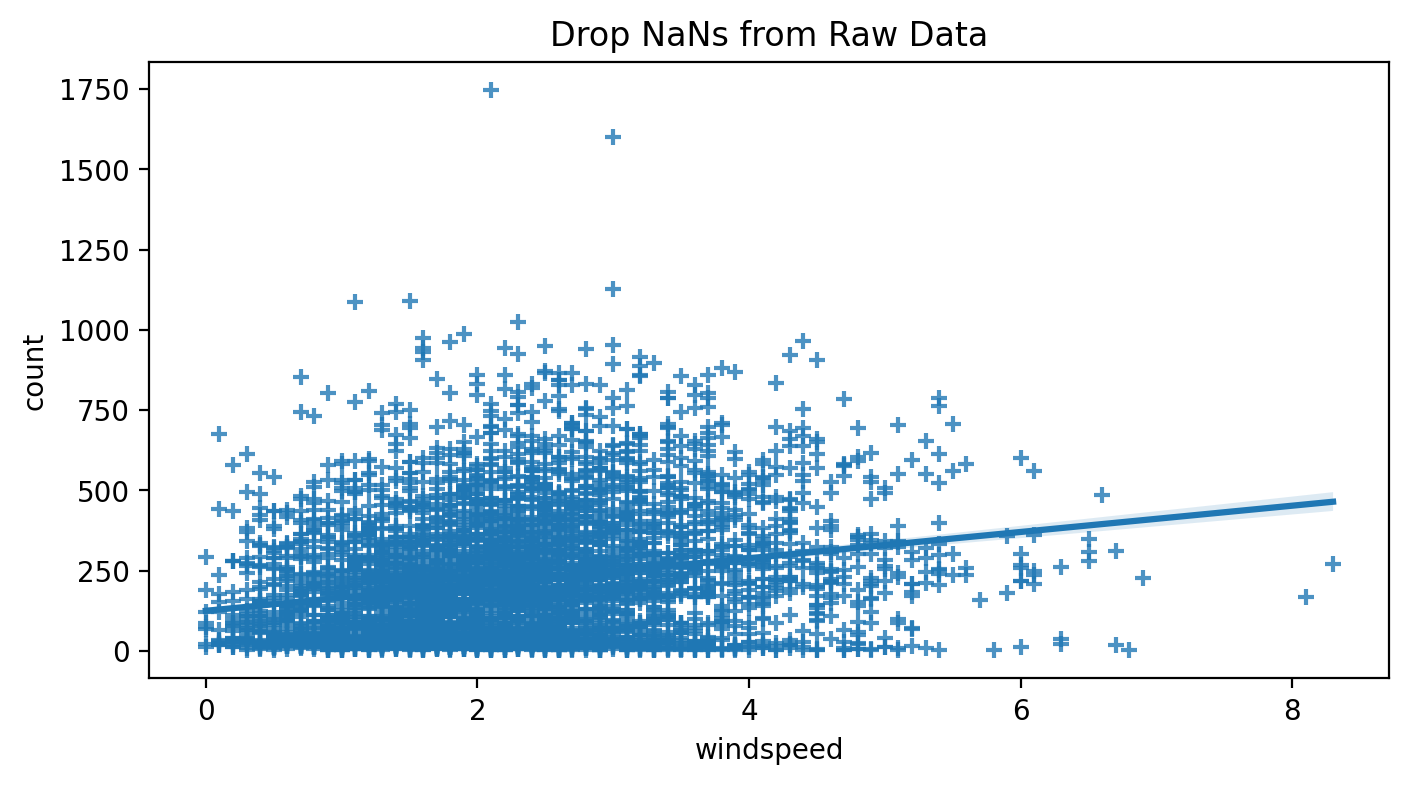

statistics: 0.22922, p-value: 1.7134562728103914e-68


In [166]:
## 시각화
plt.figure(figsize=(8,4))
plt.title("Drop NaNs from Raw Data")
sns.regplot(x='windspeed', y='count', marker='+', data=df_notnull)
plt.show()

# 수치화
stat, p_value = spst.pearsonr(df_notnull['windspeed'], df_notnull['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

`windspeed`와 `count` 사이의 상관계수는 약 0.22922로, 약한 양의 상관관계를 갖는다.  
p-value가 0이므로 이 결과는 통계적으로 유의미하다고 볼 수 있다. 

#### (6) `humidity`-`count`

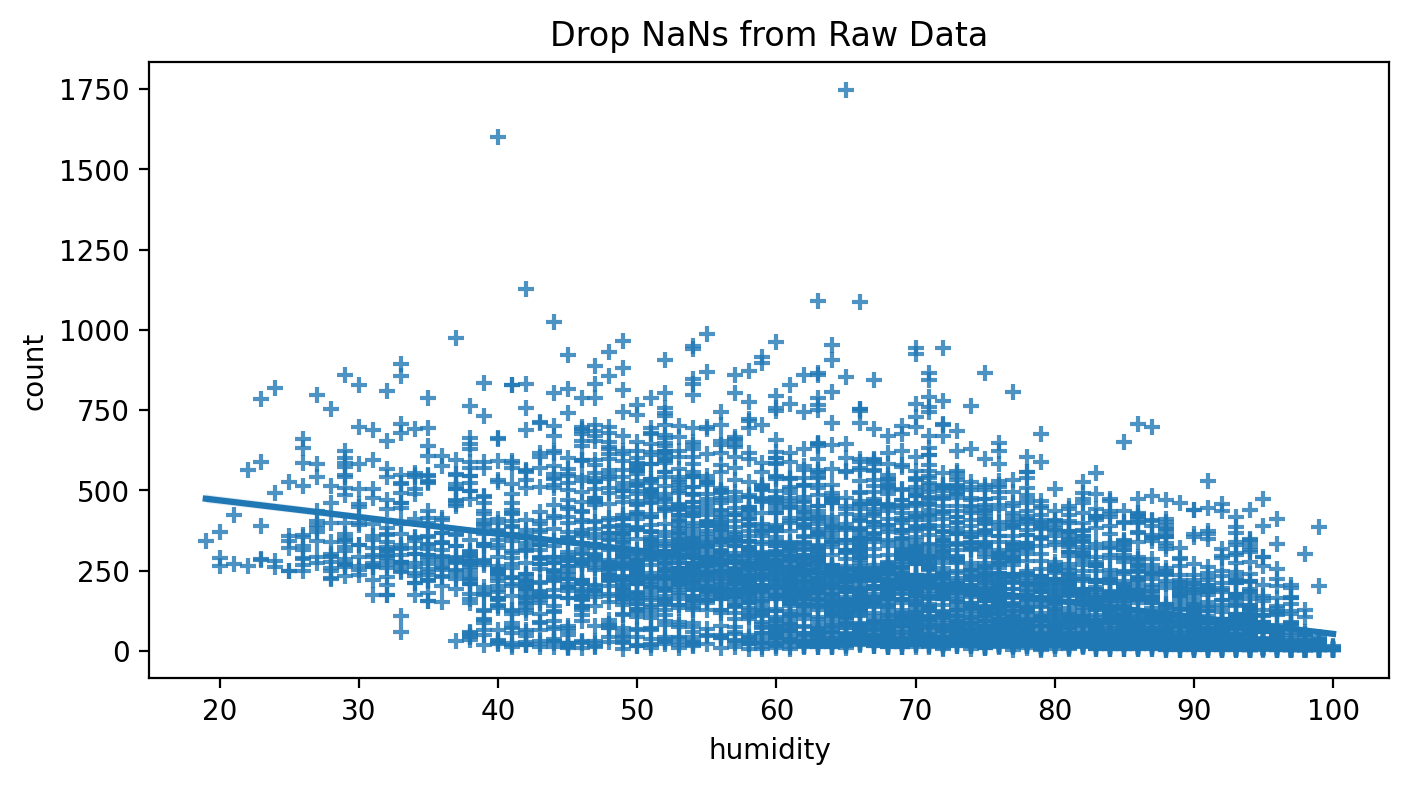

statistics: -0.48074, p-value: 0.0


In [167]:
## 시각화
plt.figure(figsize=(8,4))
plt.title("Drop NaNs from Raw Data")
sns.regplot(x='humidity', y='count', marker='+', data=df_notnull)
plt.show()

# 수치화
stat, p_value = spst.pearsonr(df_notnull['humidity'], df_notnull['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

`humidity`와 `count` 사이의 상관계수는 약 -0.48074로, 중간정도의 음의 상관관계를 갖는다.  
p-value가 0이므로 이 결과는 통계적으로 유의미하다고 볼 수 있다. 

#### (7) `visibility`-`count`

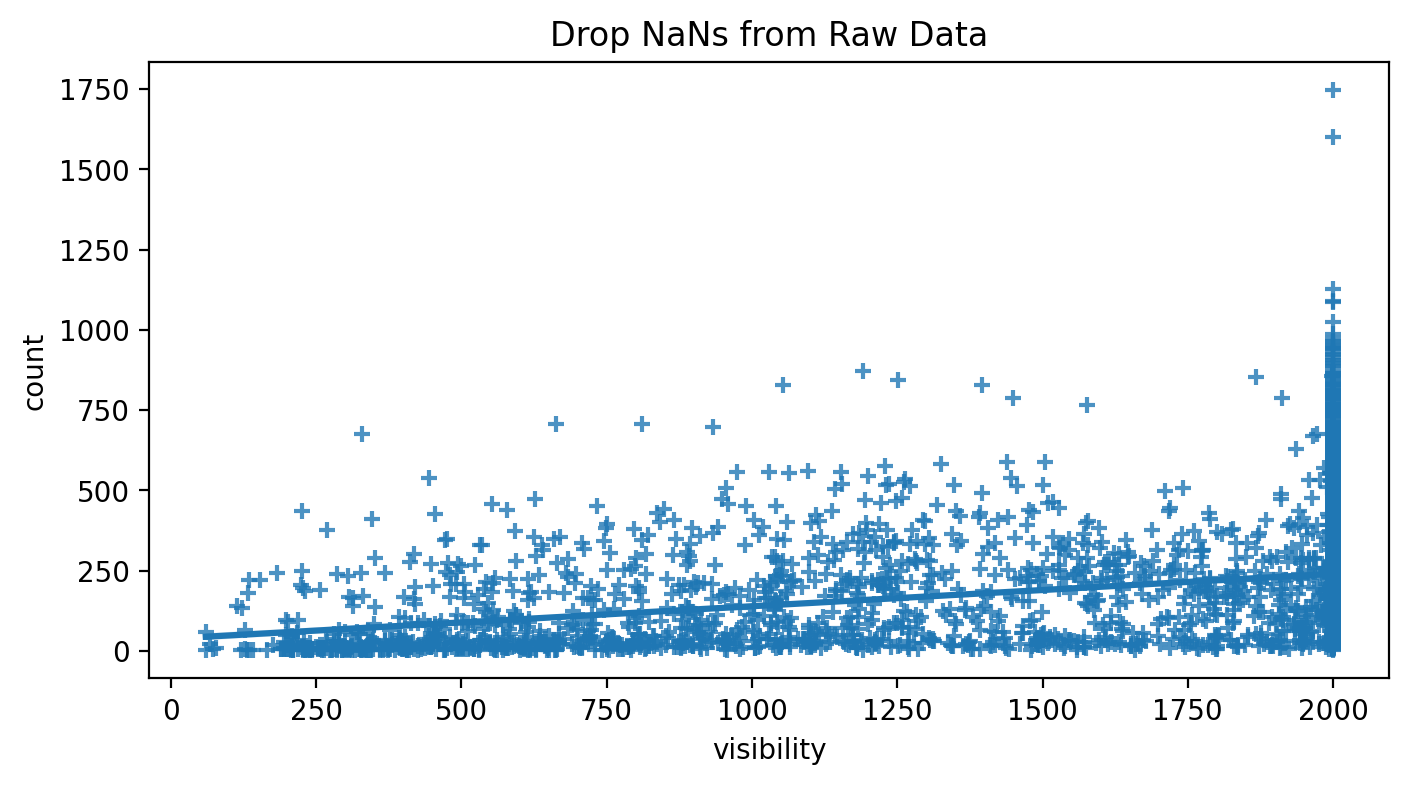

statistics: 0.26207, p-value: 1.0691328205506177e-89


In [168]:
## 시각화
plt.figure(figsize=(8,4))
plt.title("Drop NaNs from Raw Data")
sns.regplot(x='visibility', y='count', marker='+', data=df_notnull)
plt.show()

# 수치화
stat, p_value = spst.pearsonr(df_notnull['visibility'], df_notnull['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

In [178]:
df_notvisible = df.copy()
df_notvisible = df.loc[df_notvisible['visibility'] != 2000]

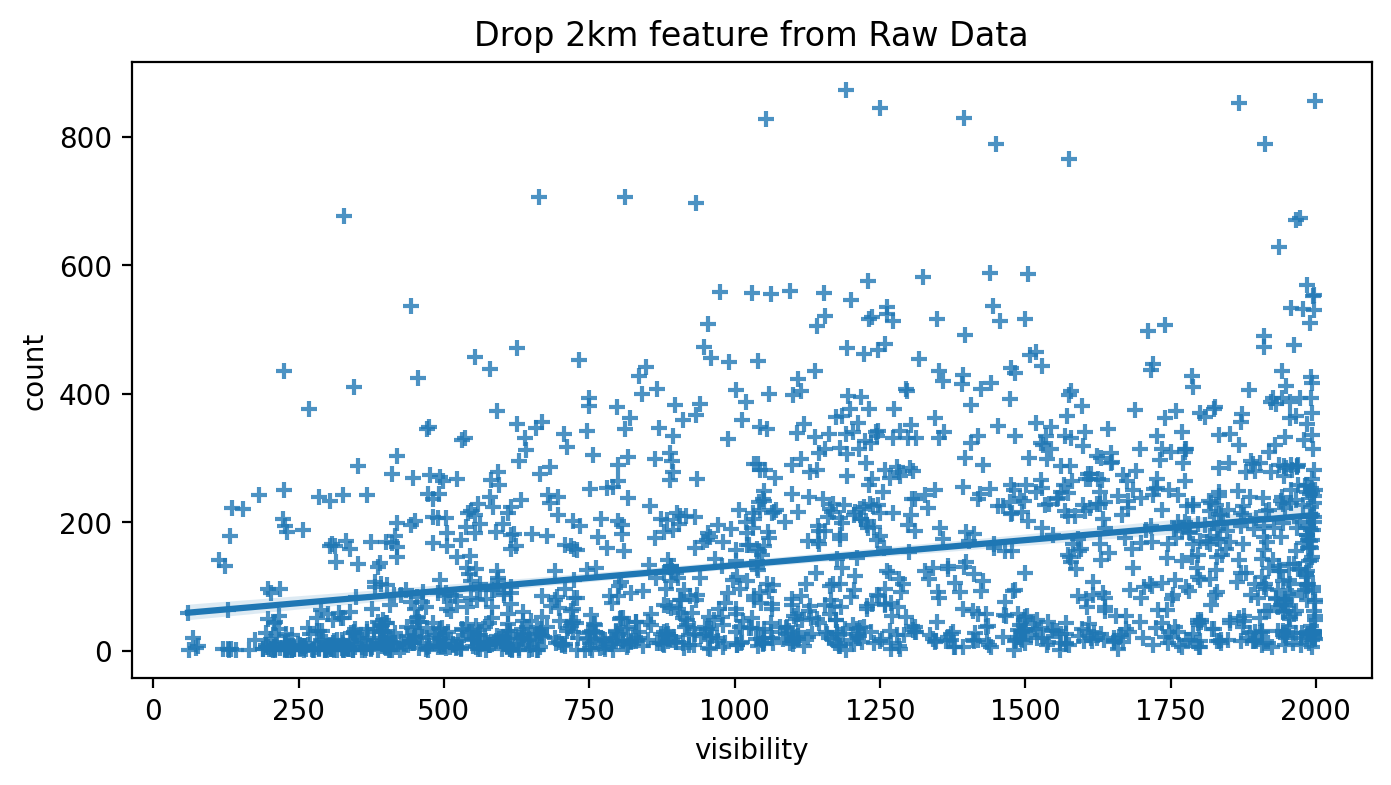

statistics: 0.29952, p-value: 1.0456989940185437e-34


In [180]:
## 시각화
plt.figure(figsize=(8,4))
plt.title("Drop 2km feature from Raw Data")
sns.regplot(x='visibility', y='count', marker='+', data=df_notvisible)
plt.show()

# 수치화
stat, p_value = spst.pearsonr(df_notvisible['visibility'], df_notvisible['count'])
print(f"statistics: {stat:.5f}, p-value: {p_value}")

`visibility`에서 2km를 제외한 데이터에 대해 상관분석을 진행했다.  
`visibility`와 `count` 사이의 상관계수는 약 0.29952로, 약한 양의 상관관계를 갖는다.  
p-value가 0이므로 이 결과는 통계적으로 유의미하다고 볼 수 있다.  

**`visibility`가 2km인 데이터를 제외하고 했을 때, 상관계수가 올라간 것을 확인할 수 있었다.**

## 6. 결론

### Feature와 Target의 상관관계 정리
- 강한 상관관계: `hour`, `precipitation`
- 중간 상관관계: `ozone`, `temperature`, `windspeed`, `humidity`(음의 상관관계), `visibility`
- 약한 상관관계: `PM10`, `PM2.5`

### 인사이트 도출
- 데이터는 2021년 4월~11월의 데이터를 기준으로 살펴봤다.
- 계절적으로 봄 ~ 여름이 약 5개월 이상, 가을 ~ 겨울이 약 3개월 미만을 차지한다.

#### 데이터의 시간적 특성이 있다고 가정
- 여름은 해가 길고, 기온이 높기 때문에 야간 사용량이 상대적으로 높을 것이다.
- **미세먼지, 초미세먼지는 대여량과 상관관계가 없다.** 기존에 생각했던 것과 달라서 이유에 대해 고민해봤다.
    - 2021년은 코로나19로 인해 마스크 의무착용이었기 때문에 외부 활동에서 미세먼지 수치가 큰 문제가 되지 않았던 것 같다.
- 따릉이는 전기자전거가 아니고, 여름에는 기온과 습도가 높으면 땀이 많이 나기 때문에 따릉이 대여량이 습도에 반비례할 것이다.
- 따릉이는 외출의 목적이 아니라, 외출한 후에 눈에 띄면 사용하기 때문에 오존, 미세먼지, 초미세먼지는 크게 영향을 주는 인자가 아닐 것이다.
#### 데이터의 시간적 특성이 없다고 가정
- 주간에는 사용량이 많고, 야간에는 사용량이 적다. (`hour`-`count`)
- 비가 온다면 사용량이 적다. (`precipitation`-`count`)
- 습도가 높으면 사용량이 적다. (`humidity`-`count`)
- 미세먼지, 초미세먼지는 대여량과 상관관계가 없다.